In [1]:
import json
import munch
import numpy as np
import equations as eqn
import PA_plot as pap
import matplotlib.pyplot as plt
from IPython.display import Markdown, Latex, display
import scipy.stats as sts
plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

config_path = r'/Users/arashfahim/Documents/Corporate-Governance-and-Asset-Pricing/Jupyter_data'

import warnings
warnings.filterwarnings('ignore')



/Users/fahim/Documents/GitHub/Corporate-Governance-and-Asset-Pricing 2/PA_plot.py:51: SyntaxWarning: invalid escape sequence '\p'
  string1 = '$F^{\prime}(w)$'
/Users/fahim/Documents/GitHub/Corporate-Governance-and-Asset-Pricing 2/PA_plot.py:53: SyntaxWarning: invalid escape sequence '\p'
  string2 = '$F^{\prime\prime}(w)$'
/Users/fahim/Documents/GitHub/Corporate-Governance-and-Asset-Pricing 2/PA_plot.py:67: SyntaxWarning: invalid escape sequence '\p'
  string1 = '$f^{\prime}(m)$'
/Users/fahim/Documents/GitHub/Corporate-Governance-and-Asset-Pricing 2/PA_plot.py:69: SyntaxWarning: invalid escape sequence '\p'
  string2 = '$f^{\prime\prime}(m)$'
/Users/fahim/Documents/GitHub/Corporate-Governance-and-Asset-Pricing 2/PA_plot.py:115: SyntaxWarning: invalid escape sequence '\m'
  if self.string == '$C(m)=\mu*T(m)-\lambda S(m)-f(m)$':
/Users/fahim/Documents/GitHub/Corporate-Governance-and-Asset-Pricing 2/PA_plot.py:126: SyntaxWarning: invalid escape sequence '\l'
  if self.string == '$C(m)+\l

# Parameters

In [2]:
config_dict = {
        "Parameters": {
        "\u03bc:": 1.0,#mu
        "\u03b3:": 0.2,#gamma
        "r:": 0.1, #kappa
        "\u03bb": 0.5,# lambda
        "\u03c3": [ # sigma
        1/(1+i) for i in range(10)
        ],
        "\u03c1": [# rho
        i*0.1 for i in range(10)
        ]
        },
        "Numerical_settings": {
        "range": 10.0,
        "Number_of_points": 2000,
        "df0": 5,
        "Stop_criterion_for_F_ODE": 0.001,
        "Upper_dy_lim": 1000,
        "Lower_dy_lim": 0.1,
        "num_iterations": 200
        },
        "color": "green"
        }

In [3]:
config = munch.munchify(config_dict)
config

Munch({'Parameters': Munch({'μ:': 1.0, 'γ:': 0.2, 'r:': 0.1, 'λ': 0.5, 'σ': [1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1], 'ρ': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]}), 'Numerical_settings': Munch({'range': 10.0, 'Number_of_points': 2000, 'df0': 5, 'Stop_criterion_for_F_ODE': 0.001, 'Upper_dy_lim': 1000, 'Lower_dy_lim': 0.1, 'num_iterations': 200}), 'color': 'green'})

# Soving the ODEs

In [4]:
PA_list=[]

PA_tmp = getattr(eqn, "eqn_FfS")(config)
print('[mu, gamma, r ,lmb ,sgm, rho]: ',PA_tmp.param)
PA_tmp.bvp()
print(PA_tmp.message)
PA_list.append(PA_tmp)

Switching values and active regimes:
 
0  to  1  at Gamma_ 1  =  -1.067  

1  to  2  at Gamma_ 2  =  -5.76  

2  to  3  at Gamma_ 3  =  -16.457  

3  to  4  at Gamma_ 4  =  -35.556  

4  to  5  at Gamma_ 5  =  -65.455  

5  to  6  at Gamma_ 6  =  -108.554  

6  to  7  at Gamma_ 7  =  -167.253  

7  to  8  at Gamma_ 8  =  -243.953  

8  to  9  at Gamma_ 9  =  -341.053  

[mu, gamma, r ,lmb ,sgm, rho]:  [1.0, 0.2, 0.1, 0.5, [1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1], [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]]
var =  0.00087        Iteration =  20
BVP for S is solved in 4.315463 seconds.

BVP for T is solved in 4.335316 seconds.

BVP for C is solved in 4.181915 seconds.


This solves the value function as a function of w, the agent's utility.

If the three numbers below, approximations of payment boundary by three methods,are almost equal, the scheme is working. 

In [5]:
sigmas = list(config_dict["Parameters"].values())[4]
rhos =list(config_dict["Parameters"].values())[5]
lmb = list(config_dict["Parameters"].values())[3]
mu = list(config_dict["Parameters"].values())[0]
-2*np.array(mu-np.array(rhos))/(np.array(sigmas)*lmb)**2


array([  -8. ,  -28.8,  -57.6,  -89.6, -120. , -144. , -156.8, -153.6,
       -129.6,  -80. ])

In [6]:
SOL = PA_list[0]


In [56]:
Gamma = np.array(SOL.Gamma)[:,0]
Gamma[Gamma > SOL.ddy[0]], SOL.swtch_pos

(array([  -1.06666667,   -5.76      ,  -16.45714286,  -35.55555556,
         -65.45454545, -108.55384615]),
 array([ 34,  50,  75, 131]))

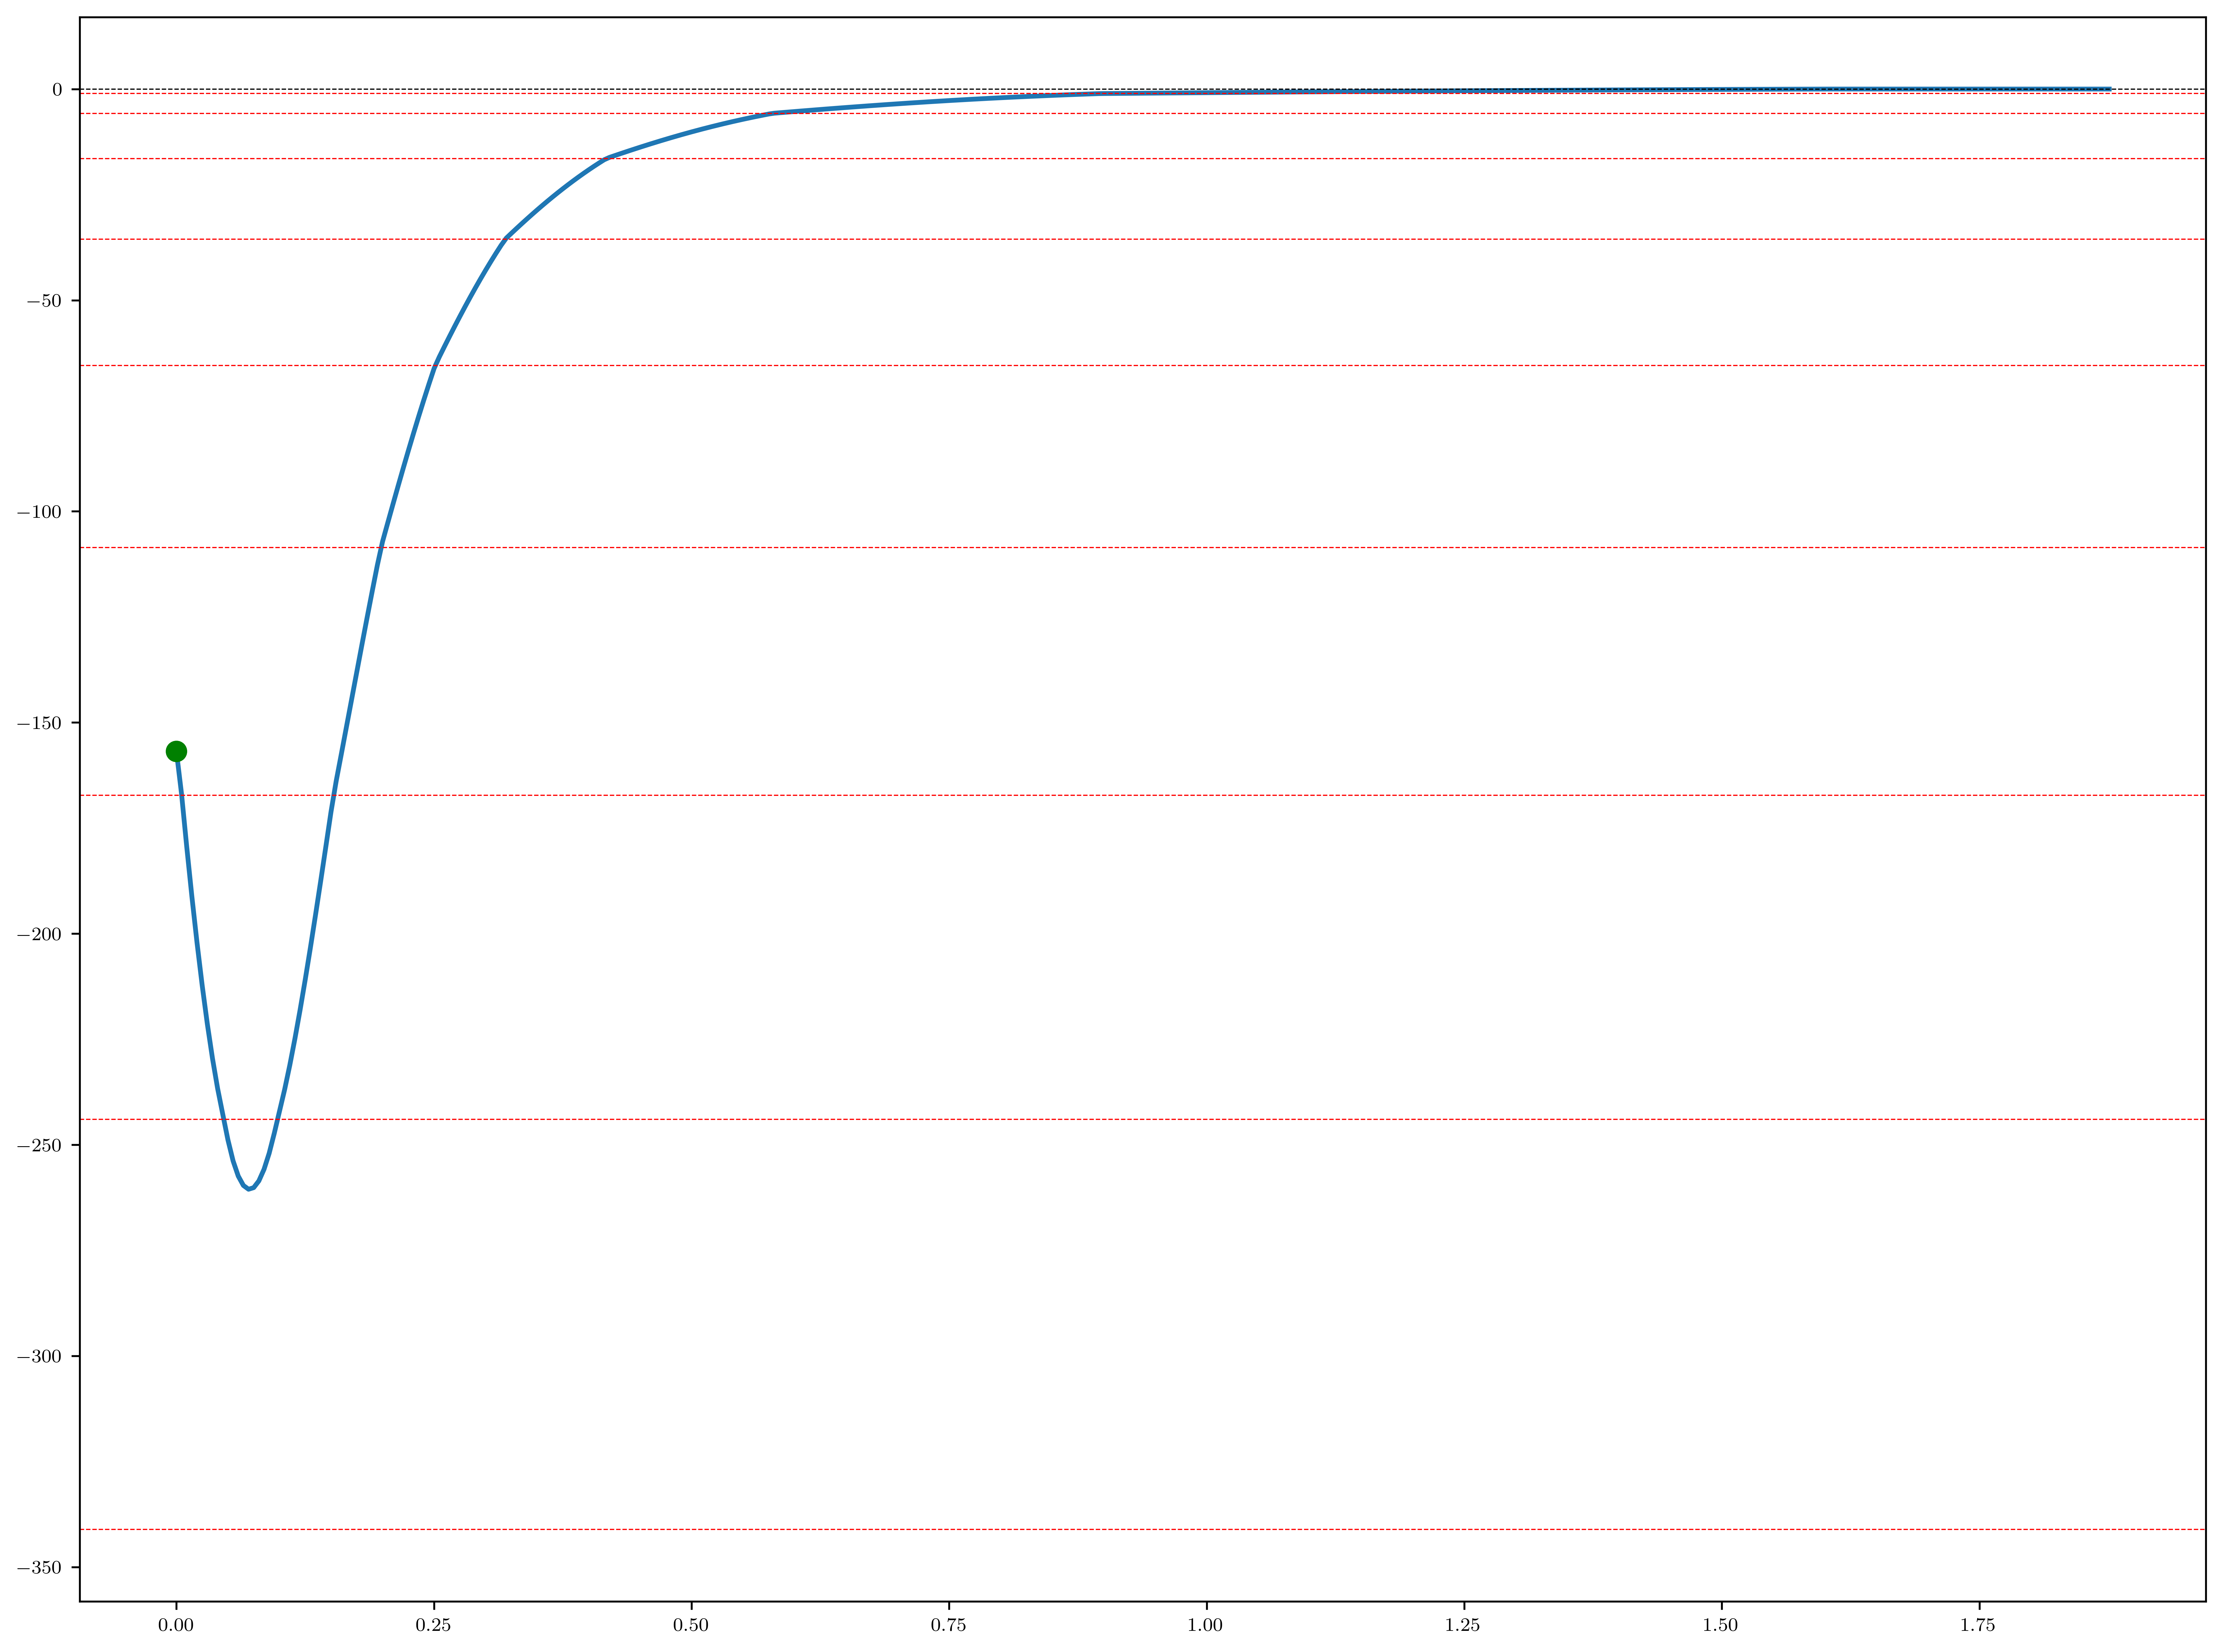

In [40]:
plt.figure(figsize=(16,12),dpi=600);
plt.plot(SOL.x,SOL.ddy, linewidth=2);
plt.axhline(y=0,color='black',linestyle='--', linewidth=0.5);
for g in SOL.Gamma:
    plt.axhline(y=g[0],color='red',linestyle='--', linewidth=0.5);
for val in [SOL.ddy[0]]:
    plt.plot([0],val,color='green',marker='o',markersize=8);
# plt.yticks([SOL.ddy[0]]+[SOL.ddy[g] for g in SOL.swtch_pos],fontsize=12);

In [38]:
SOL.swtch_pos,SOL.Gamma

(array([ 34,  50,  75, 131]),
 [[-1.0666666666666667, 0, 1],
  [-5.76, 1, 2],
  [-16.457142857142866, 2, 3],
  [-35.55555555555556, 3, 4],
  [-65.4545454545454, 4, 5],
  [-108.55384615384625, 5, 6],
  [-167.25333333333336, 6, 7],
  [-243.9529411764705, 7, 8],
  [-341.0526315789477, 8, 9]])

# Simulation of paths

In [9]:
def indicator(X):
    i = 0
    a = np.zeros(X.shape)
    while (i<X.shape[0]) and (X[i]>0):
        a[i] = X[i]
        i += 1
    X[:] = a

In [10]:
def simulate_M(PA,m0,T,N):
    dt = T/N
    gamma = PA.param[1]
    lb = PA.param[3]
    sigma = PA.optimal
    X = np.array([m0])
    shape = len(m0)
    for i in range(2,N+1):
        val = X[-1] + (gamma*X[-1])*dt + sigma(lb*X[-1])[0]*np.sqrt(dt)*np.random.normal(size=shape)
        # val = X[-1] + np.sqrt(dt)*np.random.normal(size=shape)# for testing Brownian motion is used
        val = PA.m_p - np.abs(PA.m_p - val)
        X = np.append(X,val)
        X = X.reshape(i,-1)
    return np.transpose(X)
    

In [11]:
T=50
N=500
J=1000
M = simulate_M(SOL,[SOL.m_s]*J,T,N)
M.shape

(1000, 500)

In [12]:
for i in range(M.shape[0]):
    indicator(M[i,:])
M.reshape(J*N)   


array([1.28064032, 1.29906358, 1.11507377, ..., 1.94109822, 2.30587661,
       2.46303621])

In [13]:
S = SOL.solution_S.sol(M)[0]
ES = S.mean(axis=0)
STD_S = np.sqrt((S*S).mean(axis=0))
m_p = SOL.m_p
m_s = SOL.m_s
swtch = SOL.m[SOL.swtch_pos]
Sp = SOL.solution_S.sol(M)[1]
lb = SOL.param[3]
PPS = lb/Sp



In [14]:
# S = SOL.solution_S.sol(M.reshape(J*N))[0]
# V = [vol(x) for x in M.reshape(J*N)]
# np.corrcoef(S, V)


In [15]:
Markdown(r'The volatility as a function of cash reserve  is given by $\mathcal{V}(s):= \dfrac{\mathcal{S}^{\prime}( \mathcal{S}^{-1}(s) )  \theta^*( \mathcal{S}^{-1}(s))}{s}$')

The volatility as a function of cash reserve  is given by $\mathcal{V}(s):= \dfrac{\mathcal{S}^{\prime}( \mathcal{S}^{-1}(s) )  \theta^*( \mathcal{S}^{-1}(s))}{s}$

# Optimal $\theta^*( \mathcal{S}^{-1}(s))$

In [16]:
sigma = np.zeros(M.shape)
for i in range(M.shape[0]):
    sigma[i,:] = SOL.optimal(lb*M[i,:])[0]

In [17]:
# Vol = Sp*sigma/S
vol = lambda m: SOL.optimal([SOL.param[3]*m])[0]*SOL.solution_S.sol(m)[1]/SOL.solution_S.sol(m)[0]


In [18]:
S = SOL.solution_S.sol(M.reshape(J*N))[0]
V = np.array([vol(x) for x in M.reshape(J*N)])
S.shape, V.shape

((500000,), (500000, 1))

In [19]:
t = [vol(x) for x in M.reshape(J*N)]

In [20]:
np.min(np.squeeze(t))

-2.2109845232213387e+29

In [21]:
np.corrcoef(S, np.squeeze(V))

array([[1.        , 0.40978767],
       [0.40978767, 1.        ]])

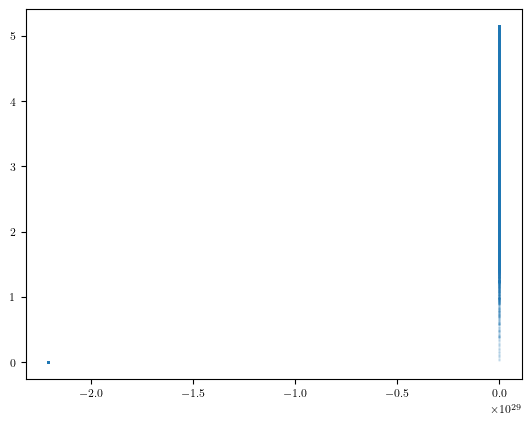

In [22]:
plt.scatter(V, S, s=1, alpha=0.1)

In [23]:
Markdown(r'The volatility as a function of asset price is given by $\mathcal{V}(s):= \dfrac{\mathcal{S}^{\prime}( \mathcal{S}^{-1} (s) )  \sigma({\lambda}\mathcal{S}^{-1} (s))}{s}$')

The volatility as a function of asset price is given by $\mathcal{V}(s):= \dfrac{\mathcal{S}^{\prime}( \mathcal{S}^{-1} (s) )  \sigma({\lambda}\mathcal{S}^{-1} (s))}{s}$

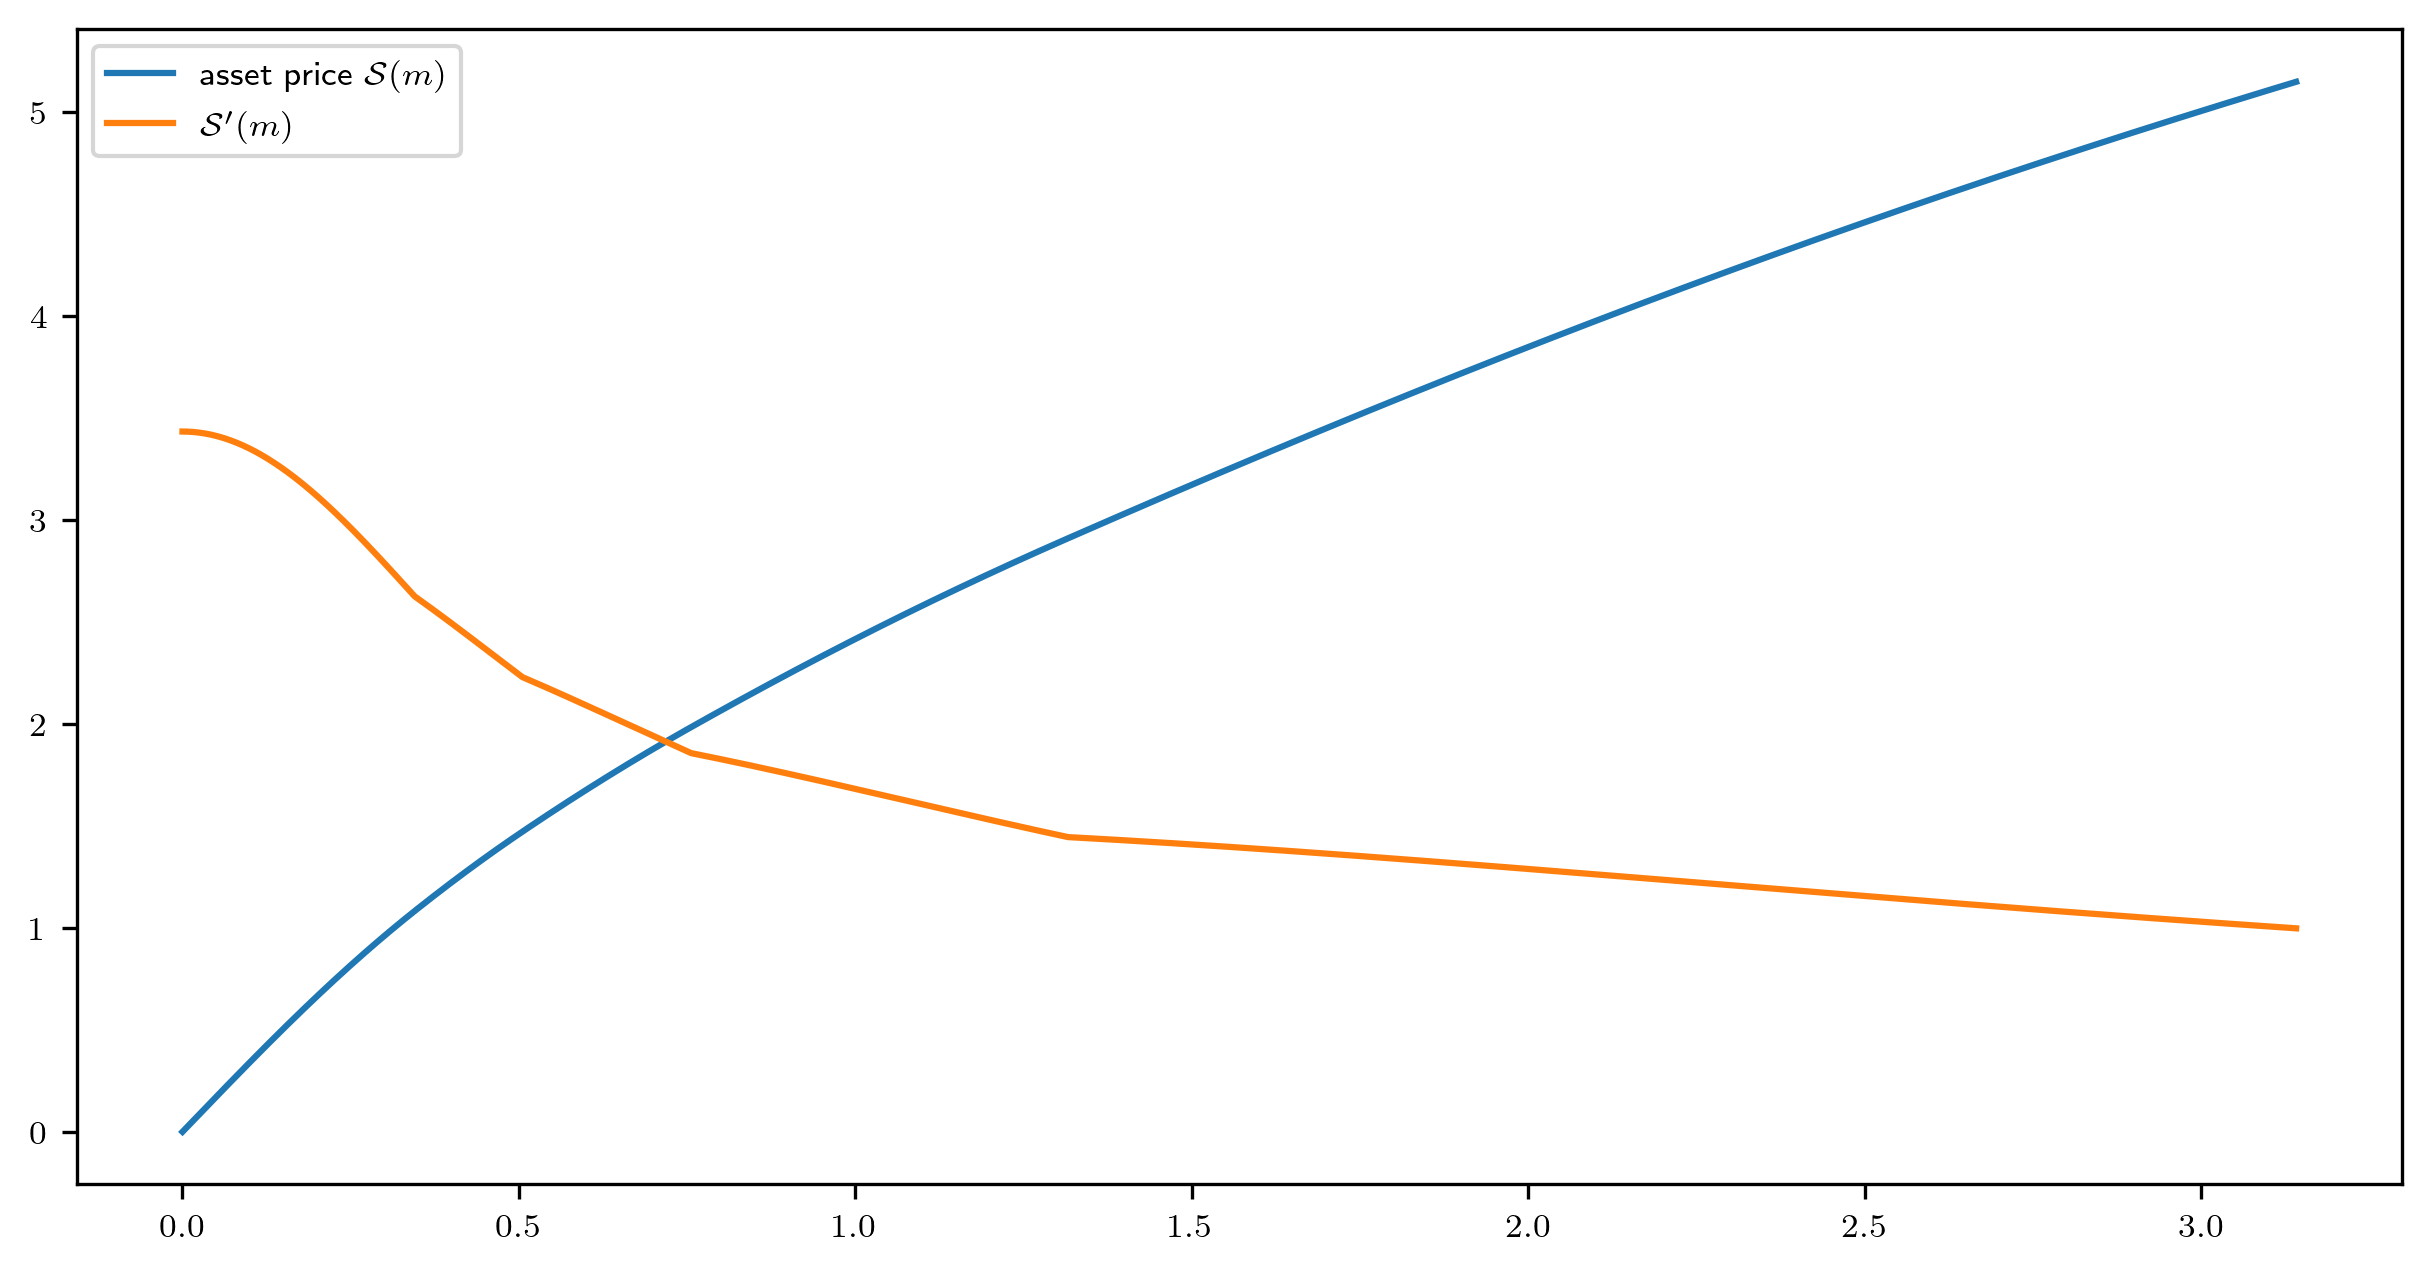

In [24]:
f = plt.figure(figsize=(10,5), dpi=300)
m = np.arange(0,m_p,0.001)
vol_m = [vol(x) for x in m]
# plt.plot(m_ ,vol_m,label='Volatility $\mathcal{V}(m)$')
plt.plot(m ,SOL.solution_S.sol(m)[0],label=r'asset price $\mathcal{S}(m)$')
plt.plot(m ,SOL.solution_S.sol(m)[1],label=r'$\mathcal{S}^\prime(m)$')
plt.legend();

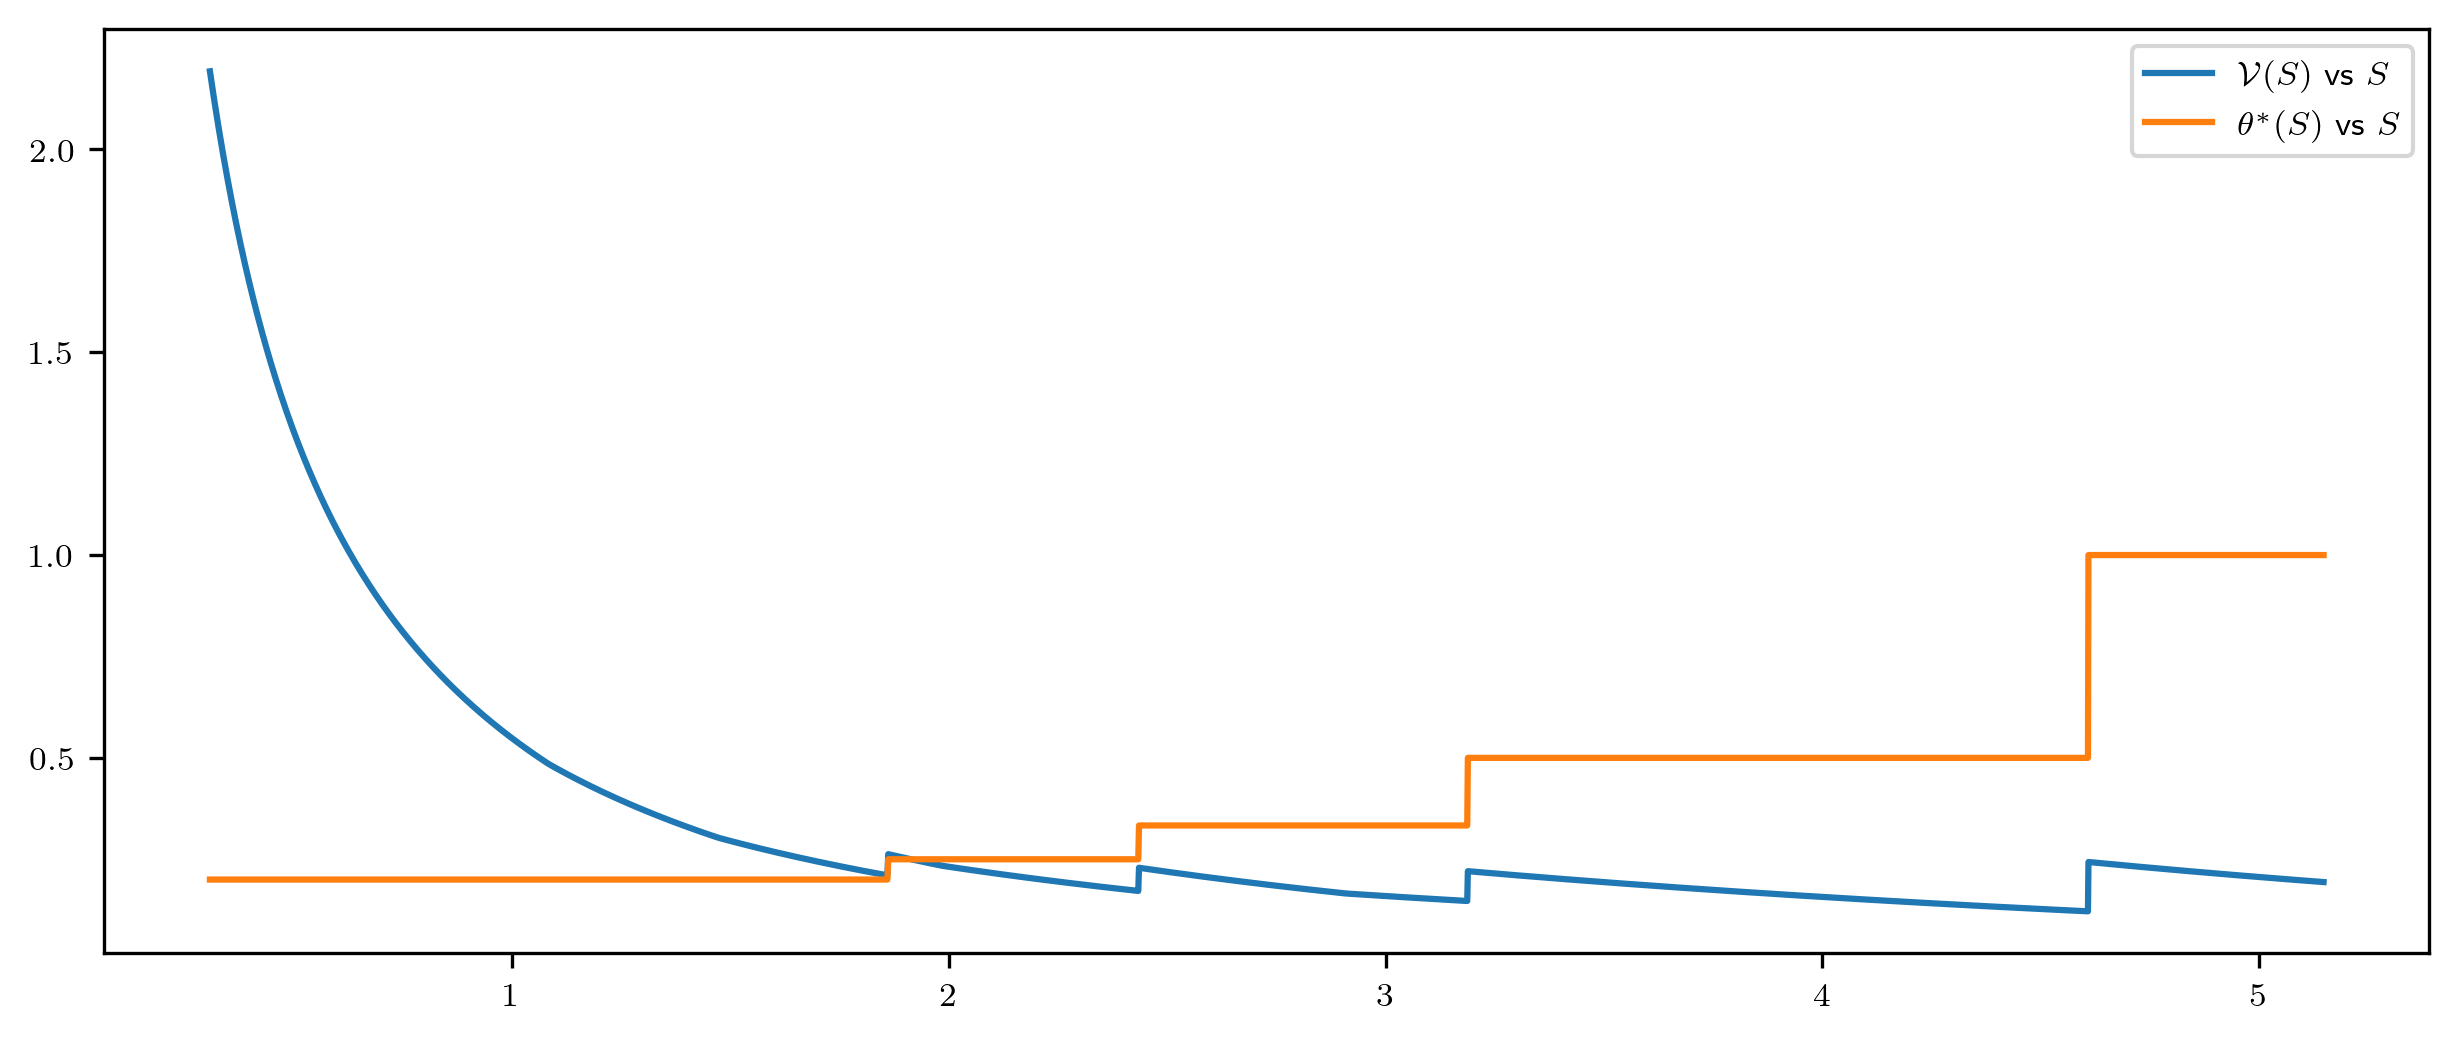

In [25]:
f = plt.figure(figsize=(10,4), dpi=300)
m = np.arange(0.09,m_p,0.001)
vol_m = np.array([vol(x) for x in m])
s_vals = SOL.solution_S.sol(m)[0]
regimes = SOL.optimal(SOL.param[3]*m)[0]
plt.plot(s_vals,vol_m ,label=r'$\mathcal{V}(S)$ vs $S$')
plt.plot(s_vals,regimes,label=r'$\theta^*(S)$ vs $S$')
plt.legend();

Write $S$ and $\mathcal{V}(S)$ in file.

In [26]:
np.savetxt('s_V_s.dat', np.concatenate((np.expand_dims(s_vals,axis=1),vol_m,np.expand_dims(regimes,axis=1)),axis=1), delimiter=' ',header= ' '.join(["S","V(S)","theta"]), comments='')


In [27]:
max(s_vals),min(s_vals),max(vol_m),min(vol_m)

(5.148935724056435,
 0.30699220045429326,
 array([2.19262411]),
 array([0.12167689]))

In [28]:
for s in swtch:
    print(s,vol(s))   

0.3401700850425213 [0.49413204]
0.5002501250625313 [0.30693982]
0.7503751875937968 [0.23613575]
1.310655327663832 [0.16637648]


In [29]:
f = plt.figure(figsize=(10,5), dpi=300)
# Vol_ = np.minimum(Vol,2)
plt.plot(np.arange(0,T,T/N),np.transpose(Vol[np.random.randint(0,1000,(10)),:]),linewidth=0.5);
plt.plot([0,T],[vol(m_p)]*2,'k.-')
for s in swtch:
    plt.plot([0,T],[vol(s)]*2,'r.-', linewidth=0.5)   
f.suptitle(r'$\mathcal{V}(m)$');    

NameError: name 'Vol' is not defined

<Figure size 3000x1500 with 0 Axes>

In [ ]:
I = []
for i in range(M.shape[0]):
    if M[i,:].all()!=0:
        I.append(i)
len(I)       
M[I,:].shape

(9956, 5000)

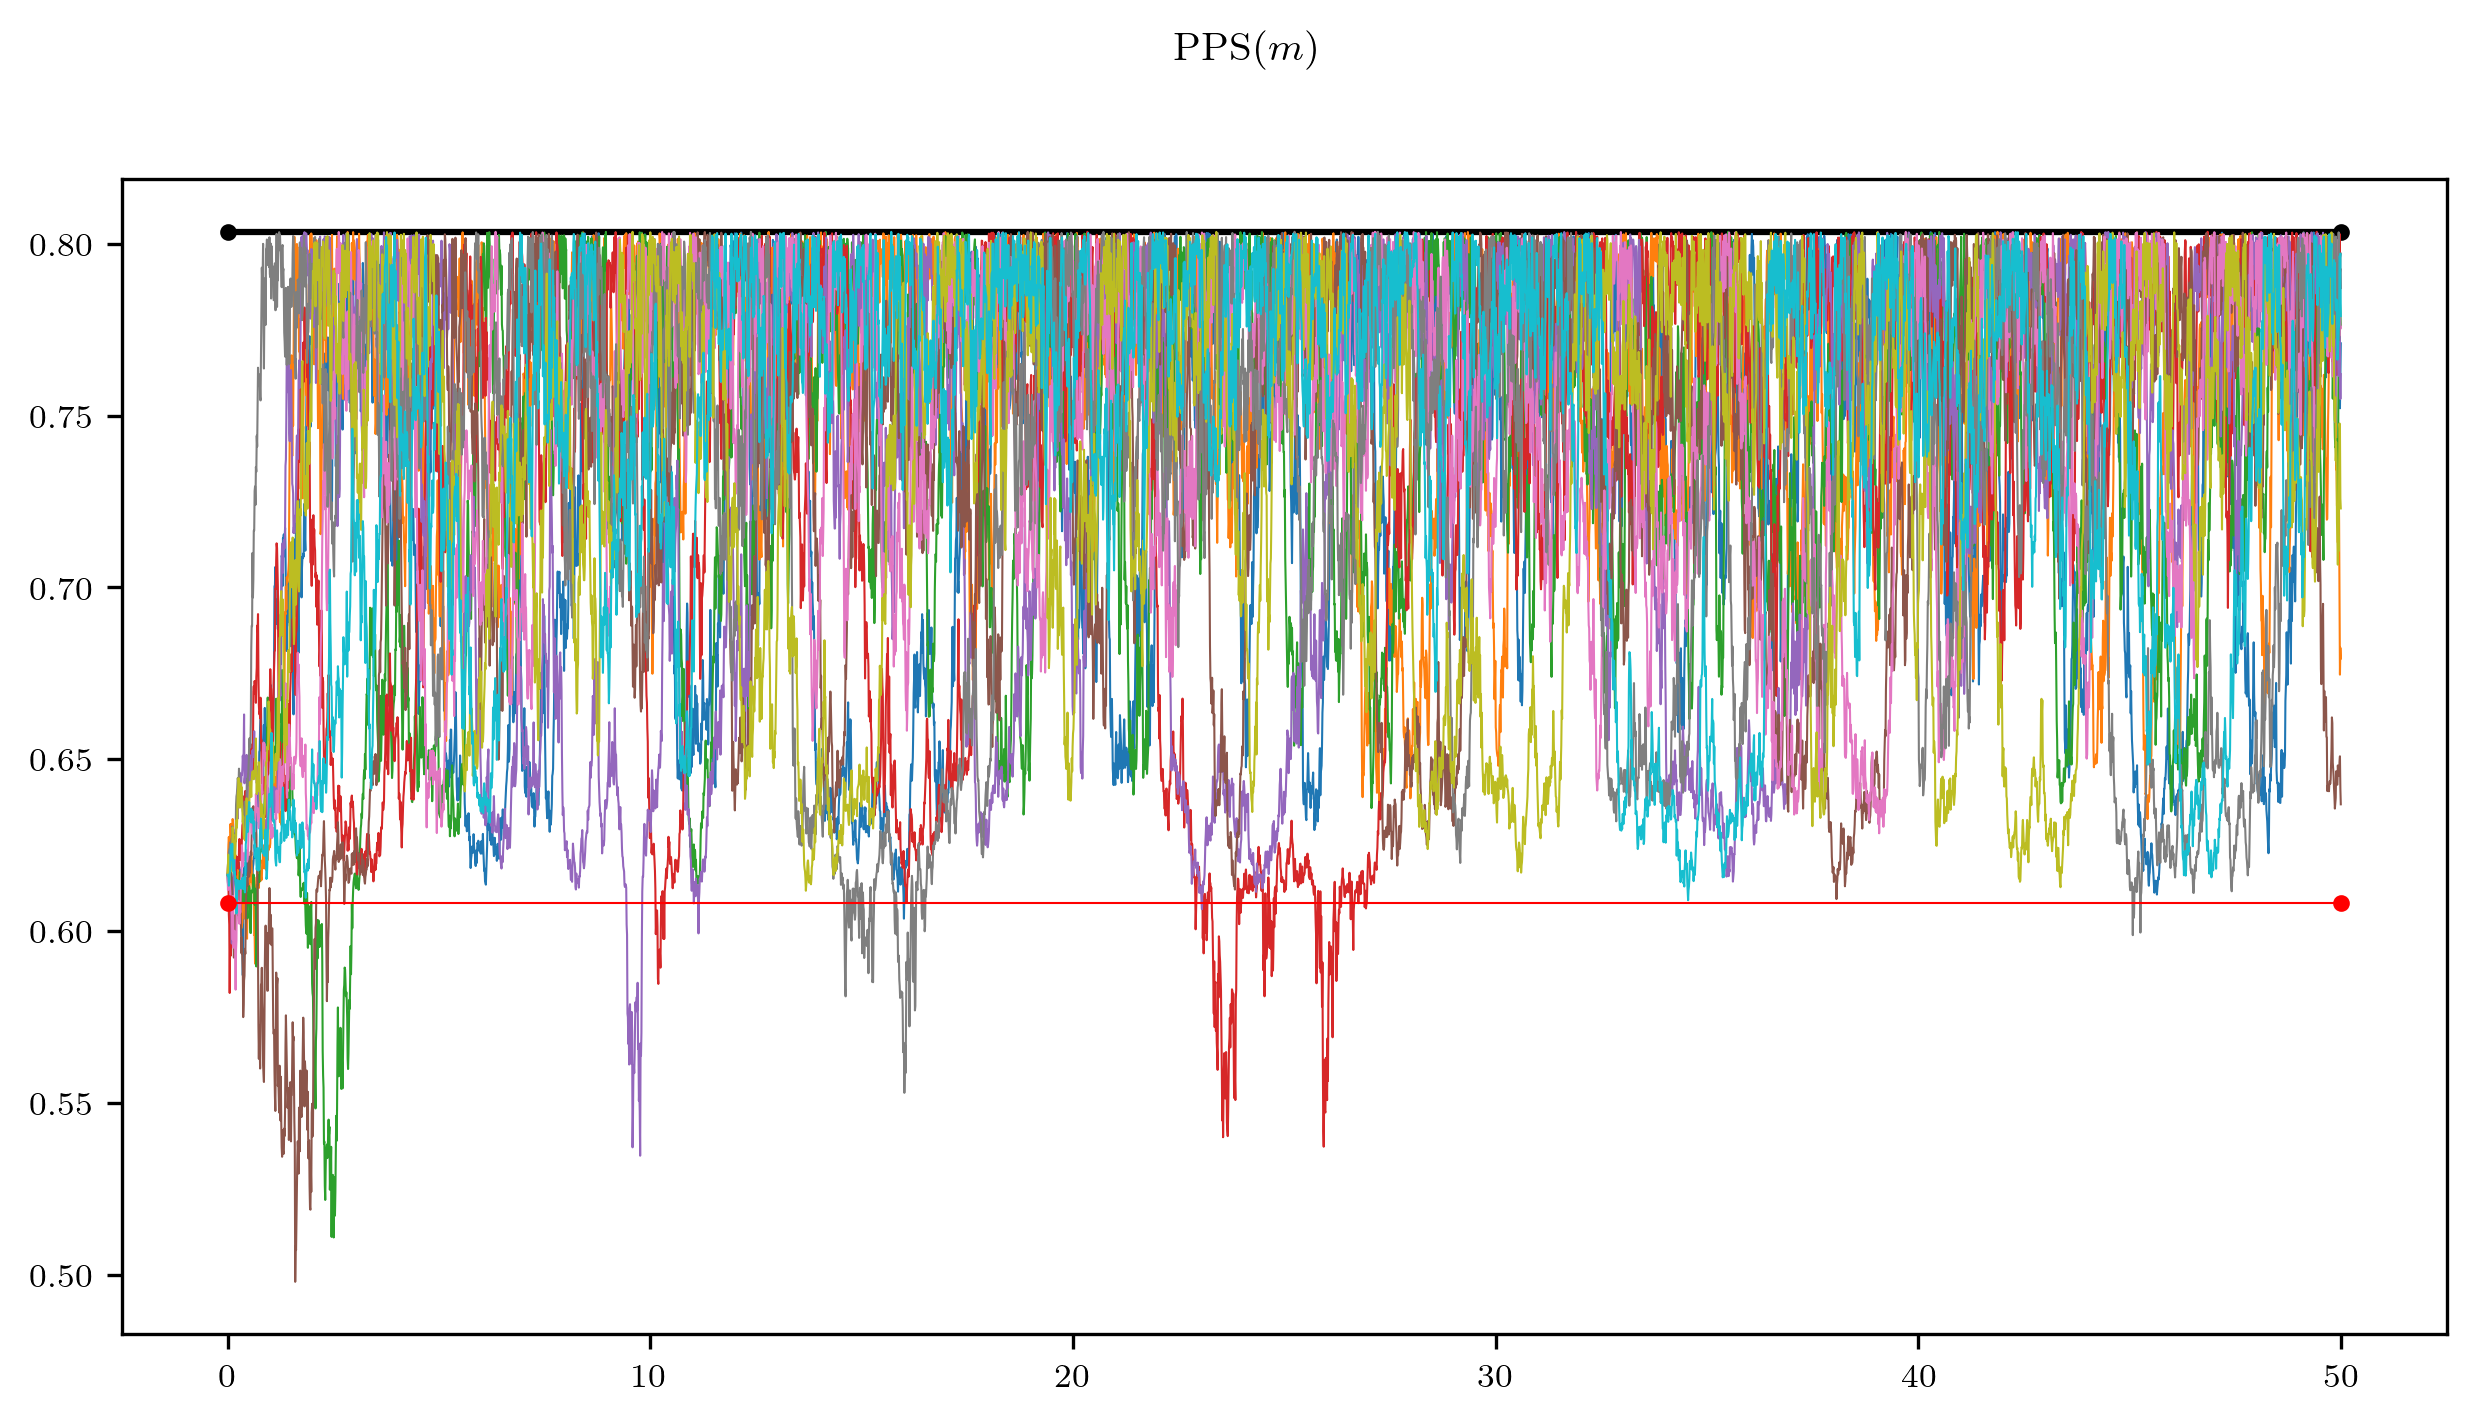

In [ ]:
f = plt.figure(figsize=(10,5), dpi=300)
plt.plot([0,T],[lb/SOL.solution_S.sol(m_p)[1]]*2,'k.-')
plt.plot(np.arange(0,T,T/N),np.transpose(PPS[np.random.randint(0,1000,(10)),:]),linewidth=0.5 );
for s in swtch:
    plt.plot([0,T],[lb/SOL.solution_S.sol(s)[1]]*2,'r.-', linewidth=0.5)    
f.suptitle(r'$\textrm{PPS}(m)$');    

In [ ]:
Markdown(r'The PPS as a function of cash reserve  is goven by $\textrm{PPS}(m):=\dfrac{\lambda\sigma(\lambda m)}{\mathcal{V}( m )  S(m)}=\dfrac{\lambda}{\mathcal{S}^{\prime}( m )}$')

The PPS as a function of cash reserve  is goven by $\textrm{PPS}(m):=\dfrac{\lambda\sigma(\lambda m)}{\mathcal{V}( m )  S(m)}=\dfrac{\lambda}{\mathcal{S}^{\prime}( m )}$

# Covariences

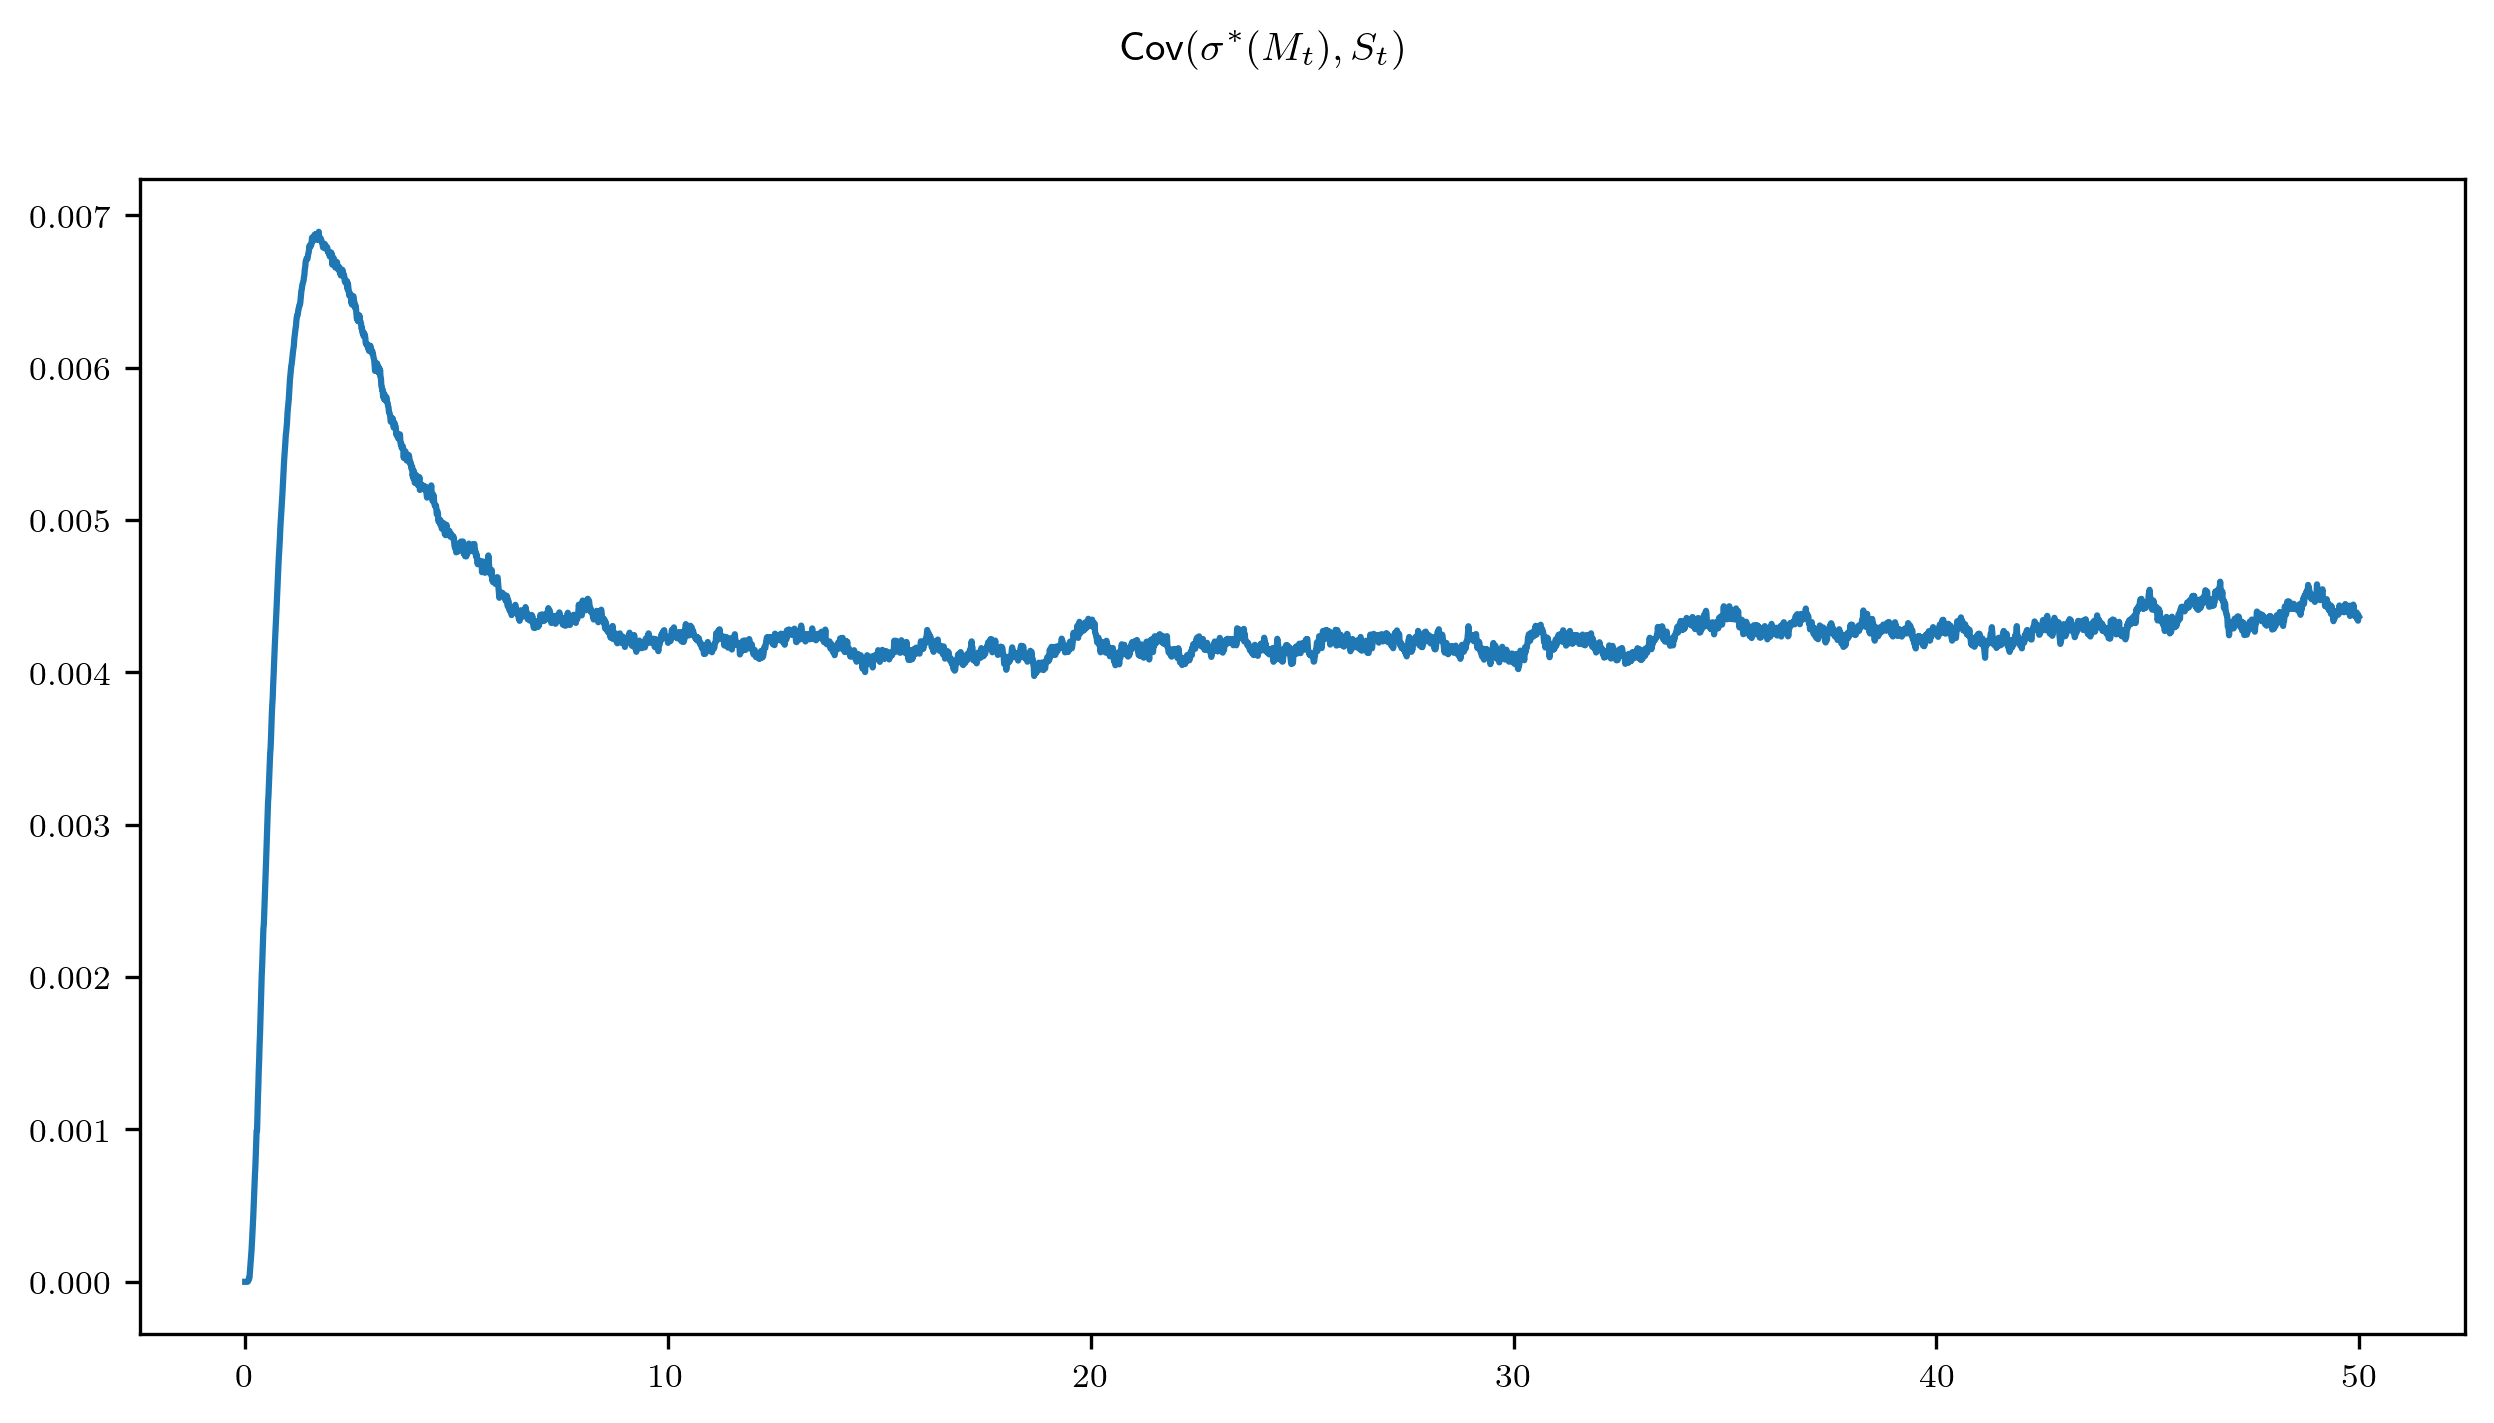

In [ ]:
f = plt.figure(figsize=(10,5), dpi=300)
plt.plot(np.arange(0,T,T/N),(sigma*S).mean(axis=0)-sigma.mean(axis=0)*S.mean(axis=0),linewidth=1.5);
f.suptitle(r'Cov$(\sigma^*(M_t),S_t)$');

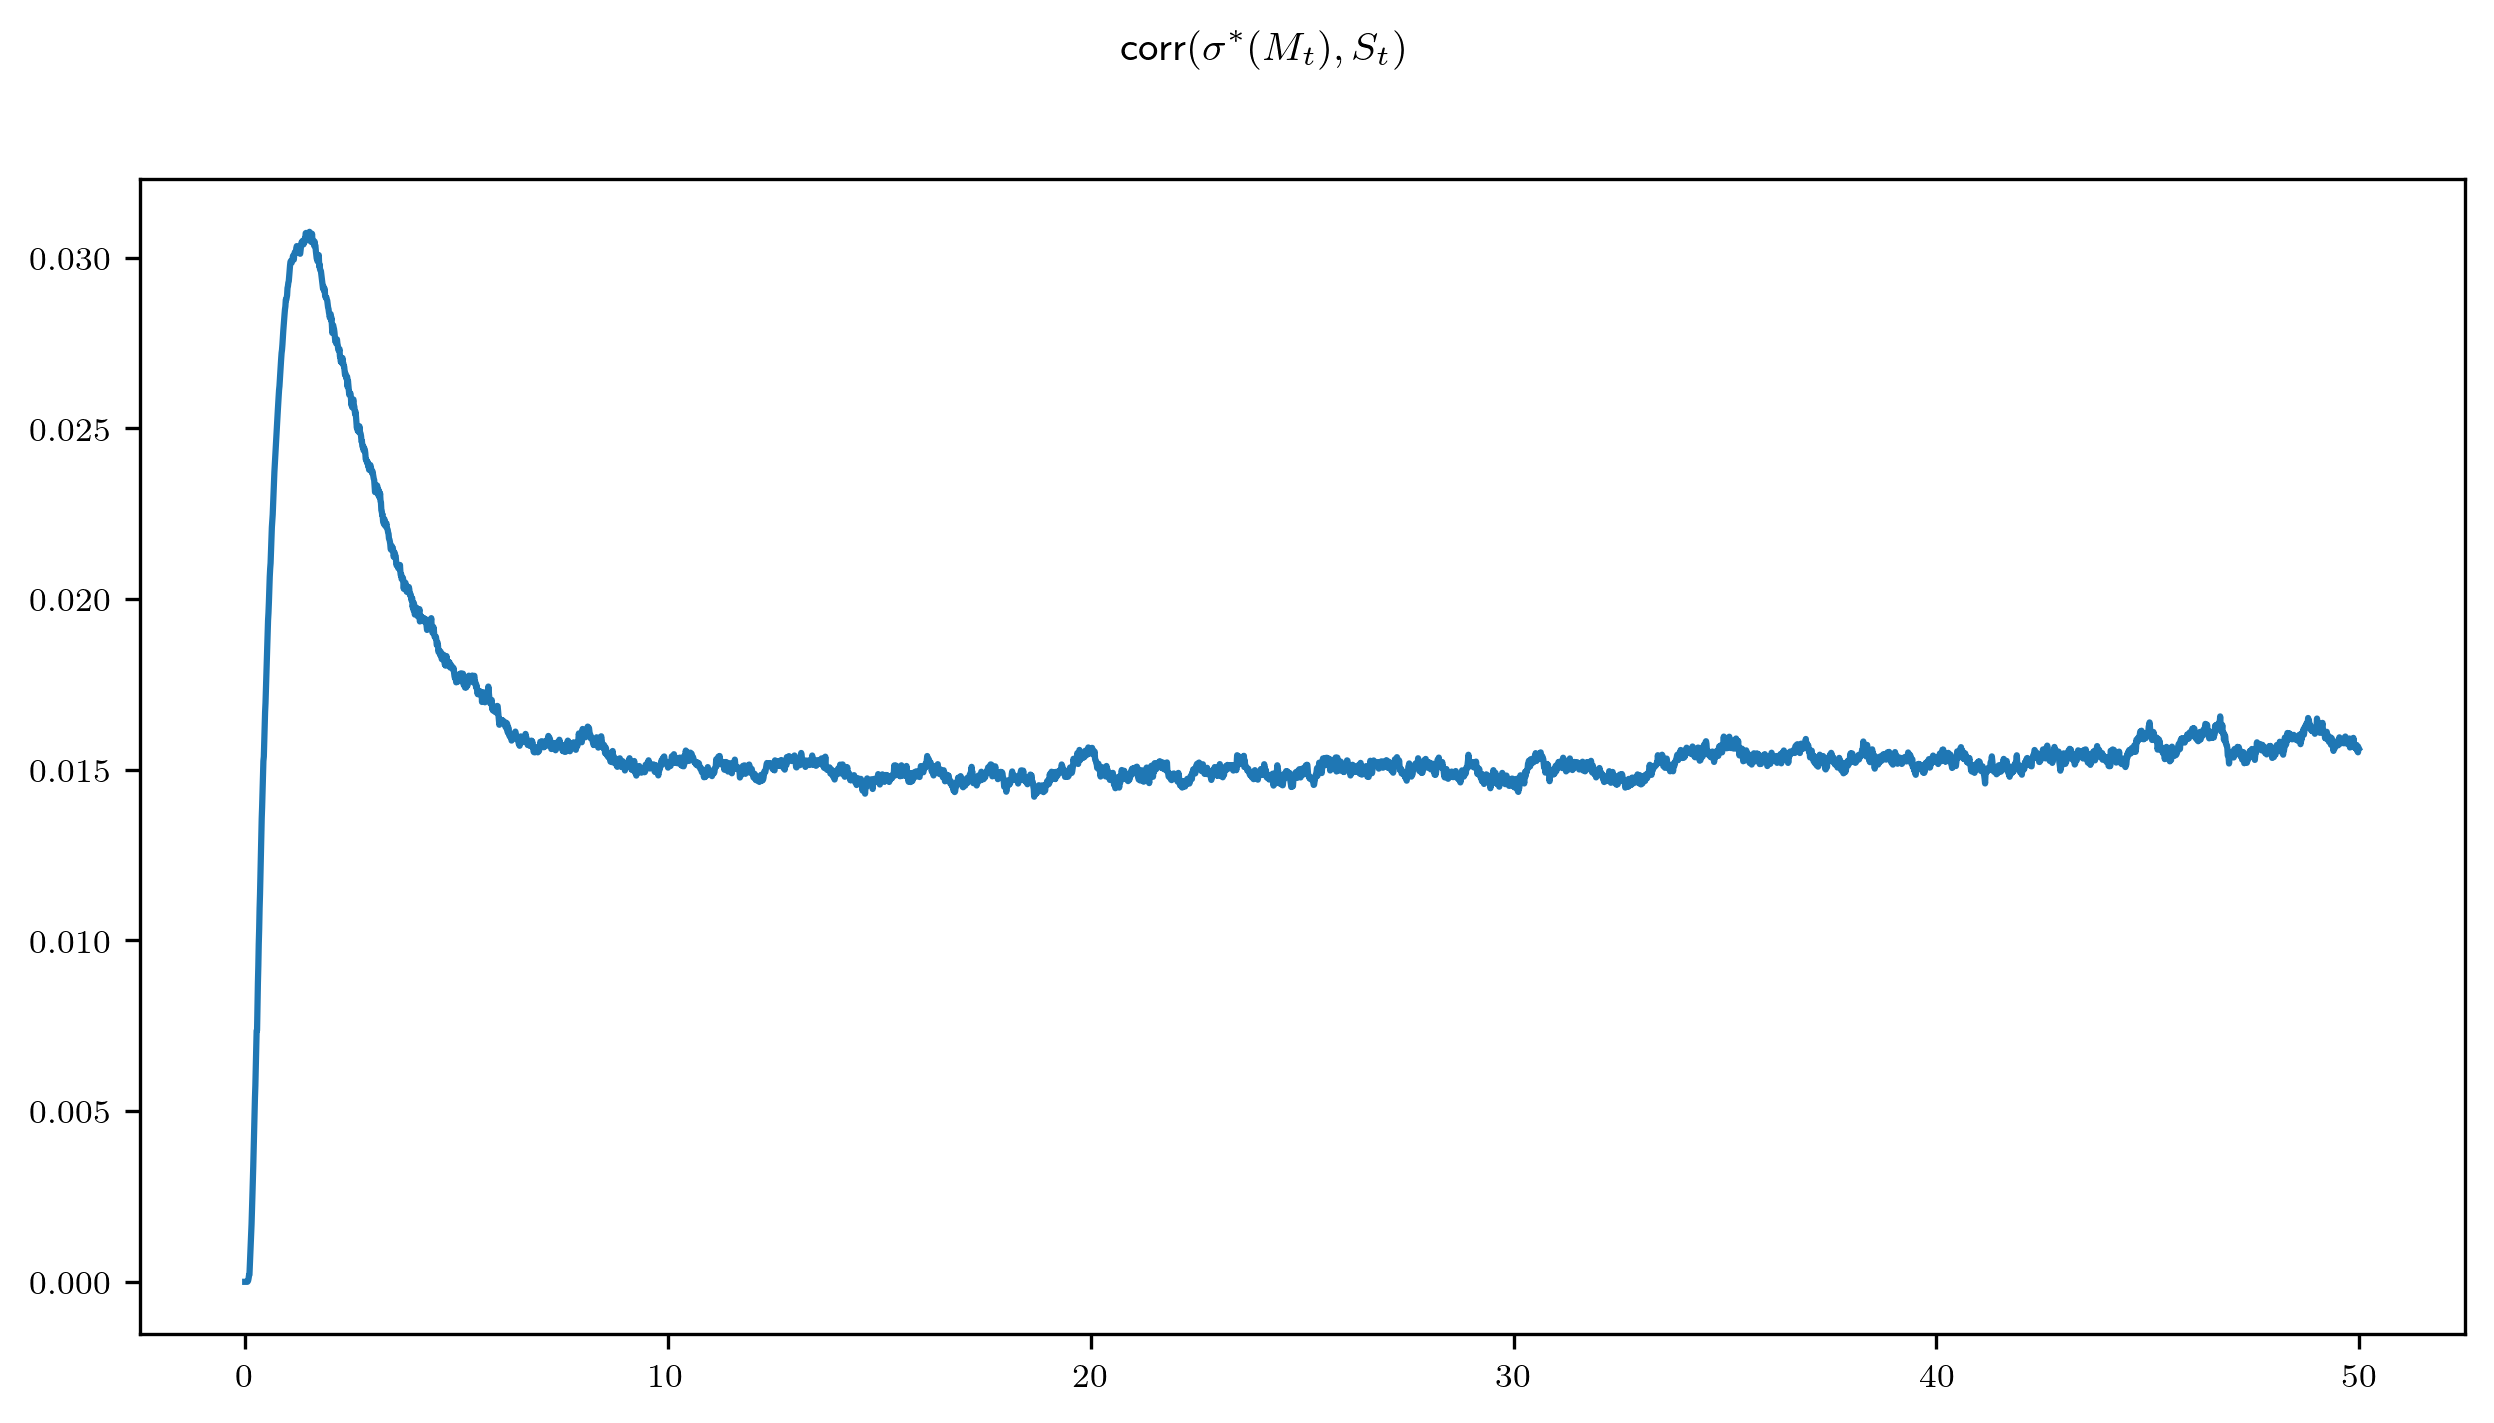

In [ ]:
f = plt.figure(figsize=(10,5), dpi=300)
plt.plot(np.arange(0,T,T/N),((sigma*S).mean(axis=0)-sigma.mean(axis=0)*S.mean(axis=0))/(np.sqrt((sigma*sigma).mean(axis=0))*np.sqrt((S*S).mean(axis=0))),linewidth=1.5);
f.suptitle(r'corr$(\sigma^*(M_t),S_t)$');

In [ ]:
Vol[I,:]

array([[0.10951952, 0.11009021, 0.11248809, ..., 0.16697982, 0.15875537,
        0.16103173],
       [0.10951952, 0.11065886, 0.1103767 , ..., 0.18016662, 0.17654905,
        0.18090886],
       [0.10951952, 0.11266348, 0.11279335, ..., 0.15257302, 0.15188036,
        0.15276358],
       ...,
       [0.10951952, 0.10949587, 0.11178259, ..., 0.13803784, 0.13530935,
        0.137389  ],
       [0.10951952, 0.10833659, 0.10767613, ..., 0.13363278, 0.13494293,
        0.13428098],
       [0.10951952, 0.11071783, 0.10964821, ..., 0.14411194, 0.14130197,
        0.14600888]])

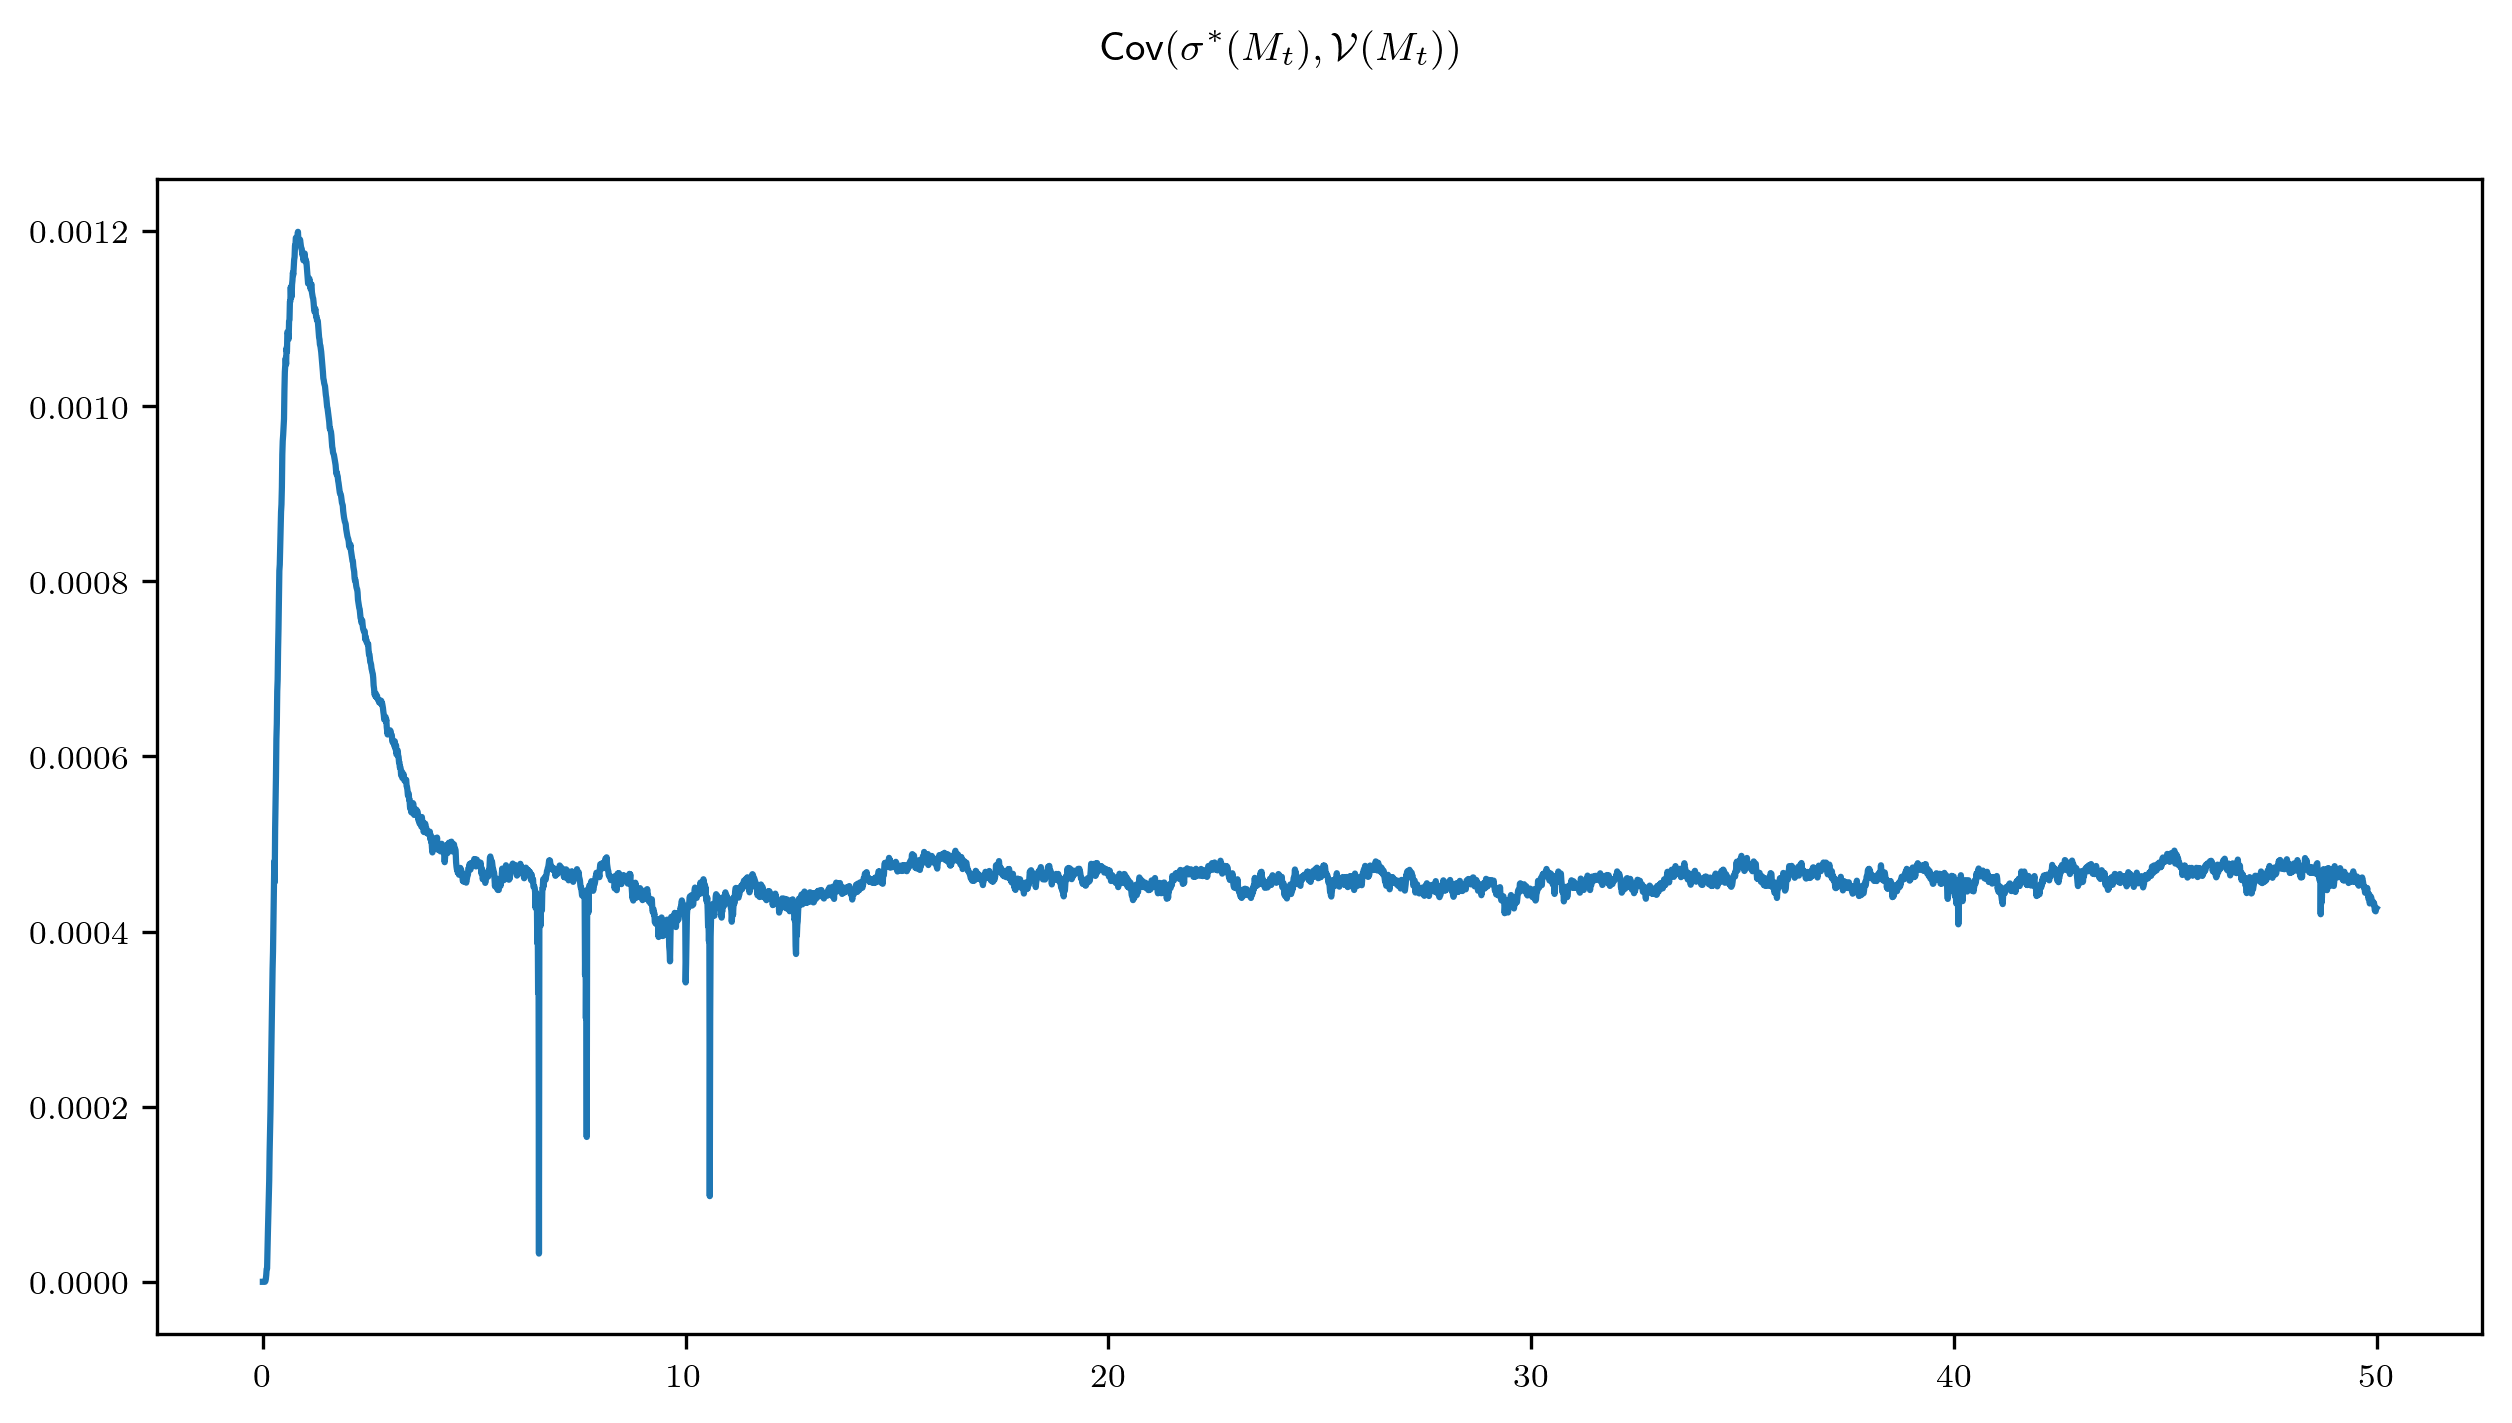

In [ ]:
f = plt.figure(figsize=(10,5), dpi=300)
plt.plot(np.arange(0,T,T/N),((sigma[I,:]*Vol[I,:]).mean(axis=0)-sigma[I,:].mean(axis=0)*Vol[I,:].mean(axis=0)),linewidth=1.5);

# Y = np.zeros(X.shape)
# sigma = np.zeros(X.shape)
# for i in range(X.shape[0]):
#     sigma[i,:] = SOL.optimal(np.array([SOL.param[3]]*X[i,:]))[0]
#     Y[i,:] = vol(X[i,:])*sigma[i,:]
# sigma_var = np.sqrt((sigma*sigma).sum(axis=0))    
# Xvar = np.sqrt((X*X).sum(axis=0))
# plt.plot(np.arange(0,T,T/N),(Y.mean(axis=0)-sigma.mean(axis=0)*X.mean(axis=0))/(Xvar*sigma_var),linewidth=1.5);
f.suptitle(r'Cov$(\sigma^*(M_t),\mathcal{V}(M_t))$');

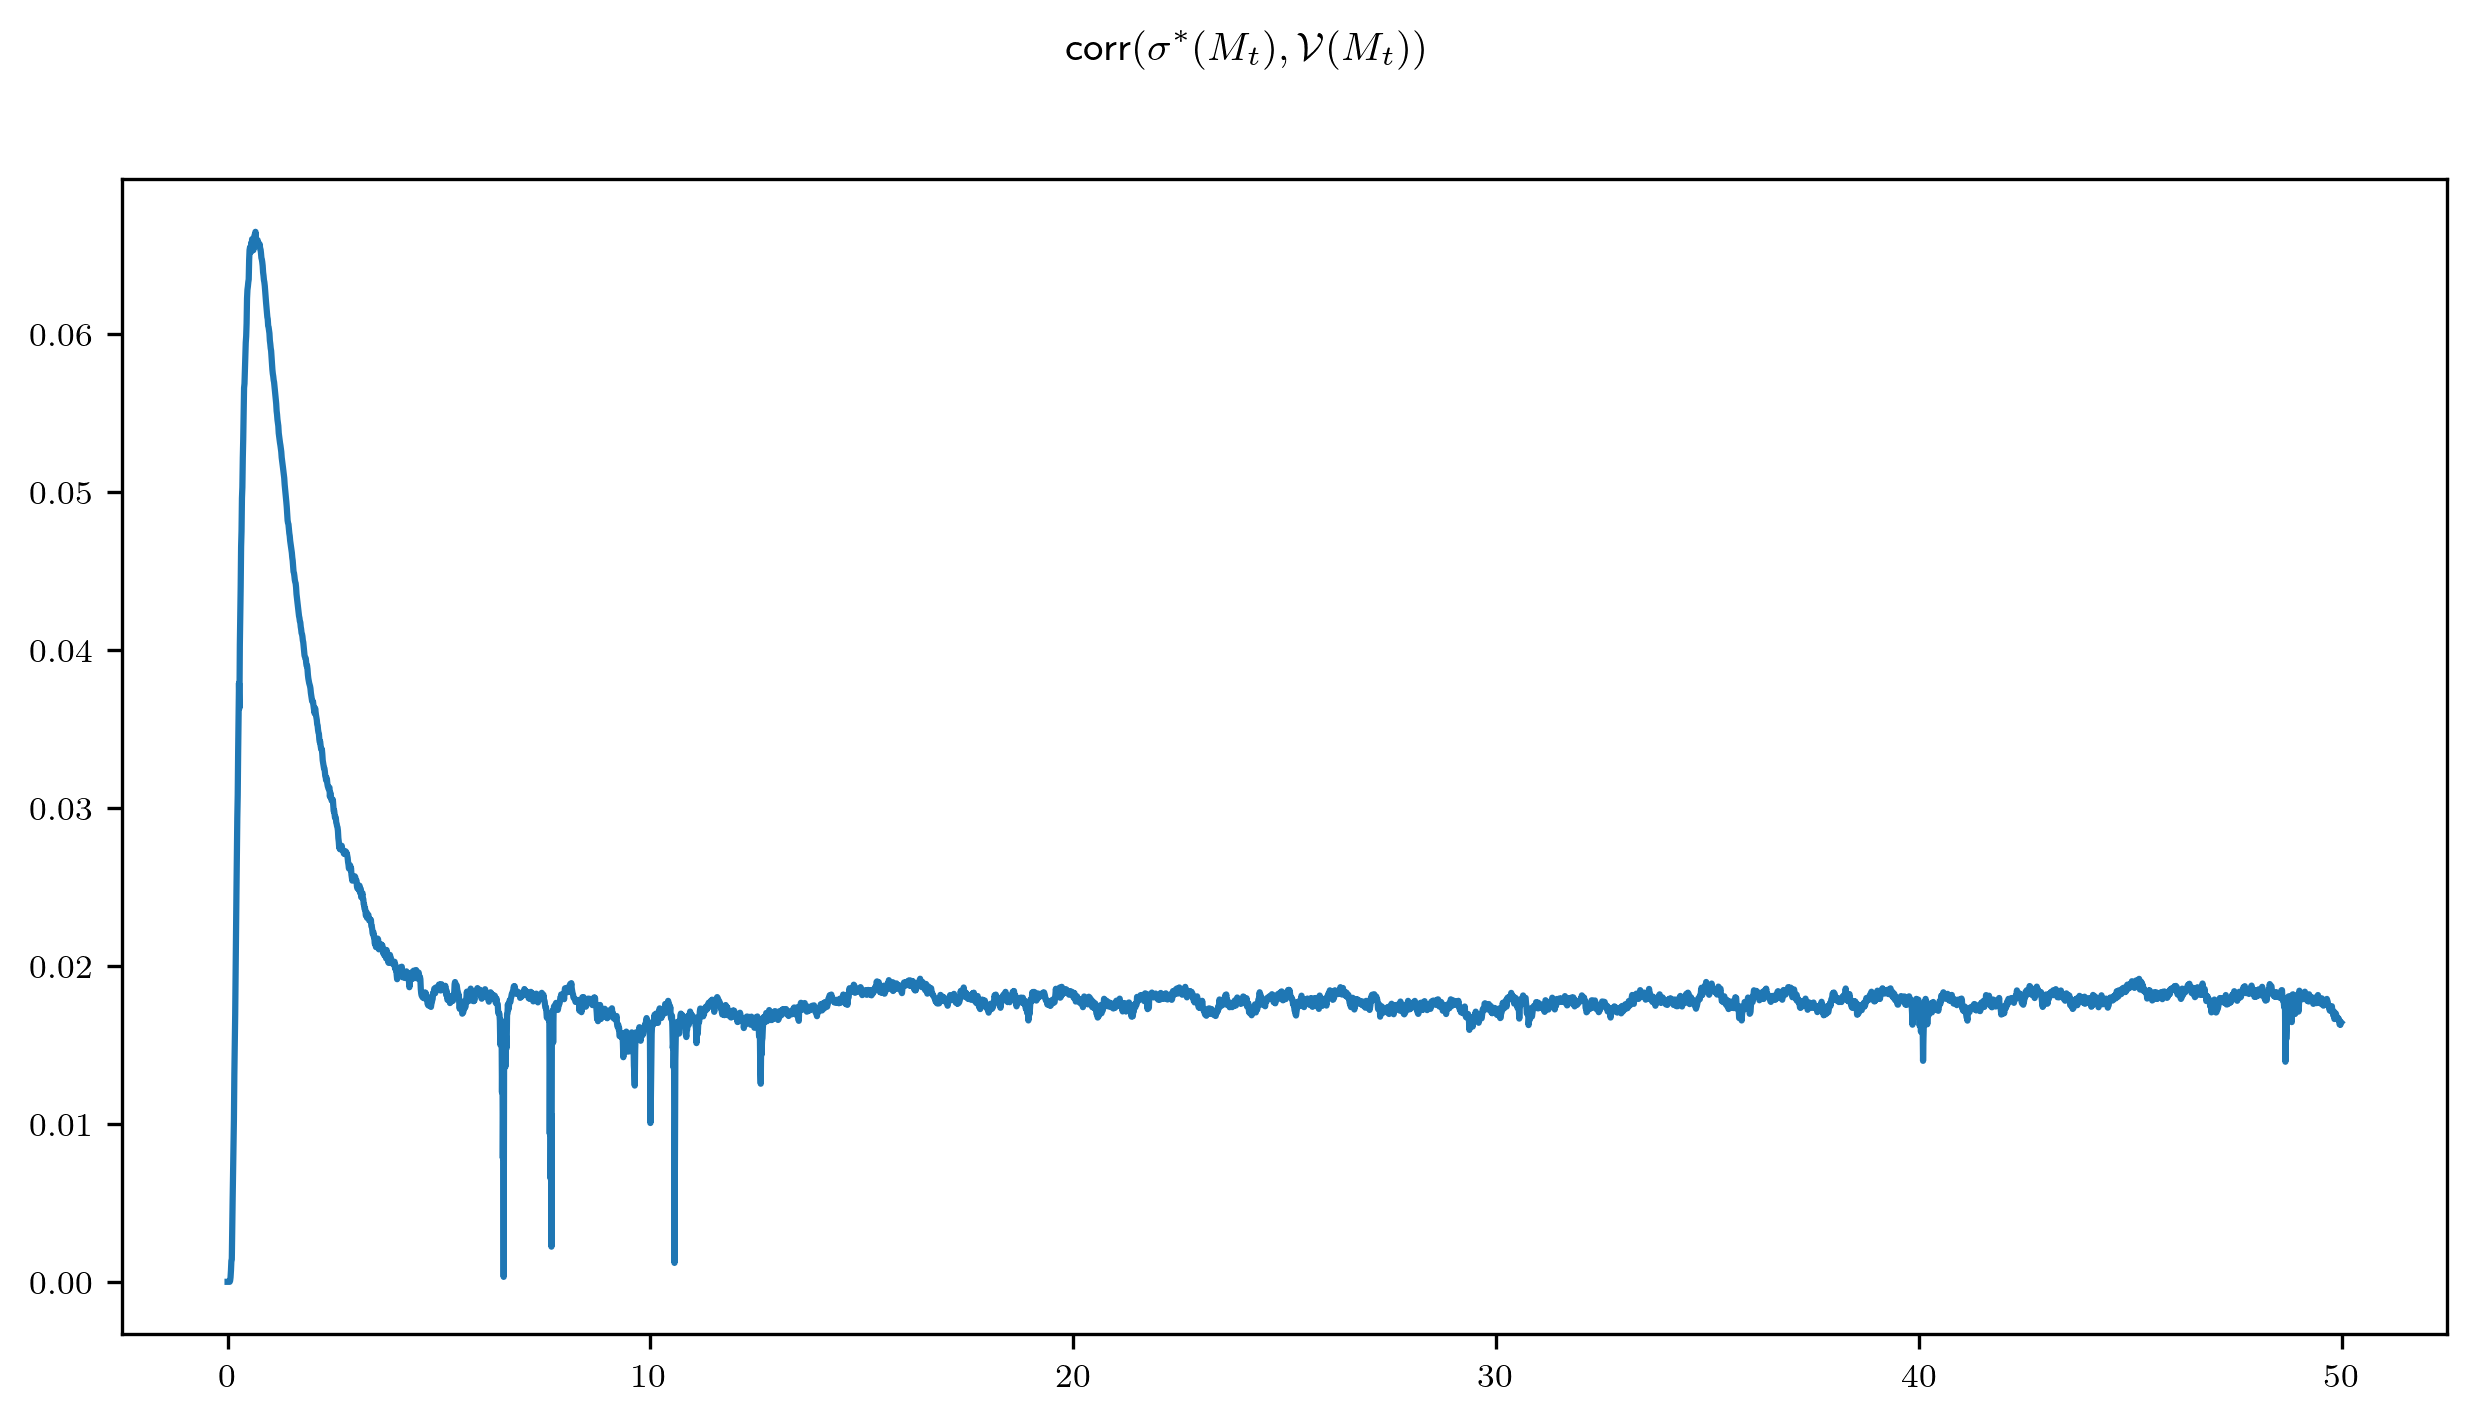

In [ ]:
f = plt.figure(figsize=(10,5), dpi=300)
plt.plot(np.arange(0,T,T/N),((sigma[I,:]*Vol[I,:]).mean(axis=0)-sigma[I,:].mean(axis=0)*Vol[I,:].mean(axis=0))/(np.sqrt((sigma[I,:]*sigma[I,:]).mean(axis=0))*np.sqrt((Vol[I,:]*Vol[I,:]).mean(axis=0))),linewidth=1.5);
f.suptitle(r'corr$(\sigma^*(M_t),\mathcal{V}(M_t))$');

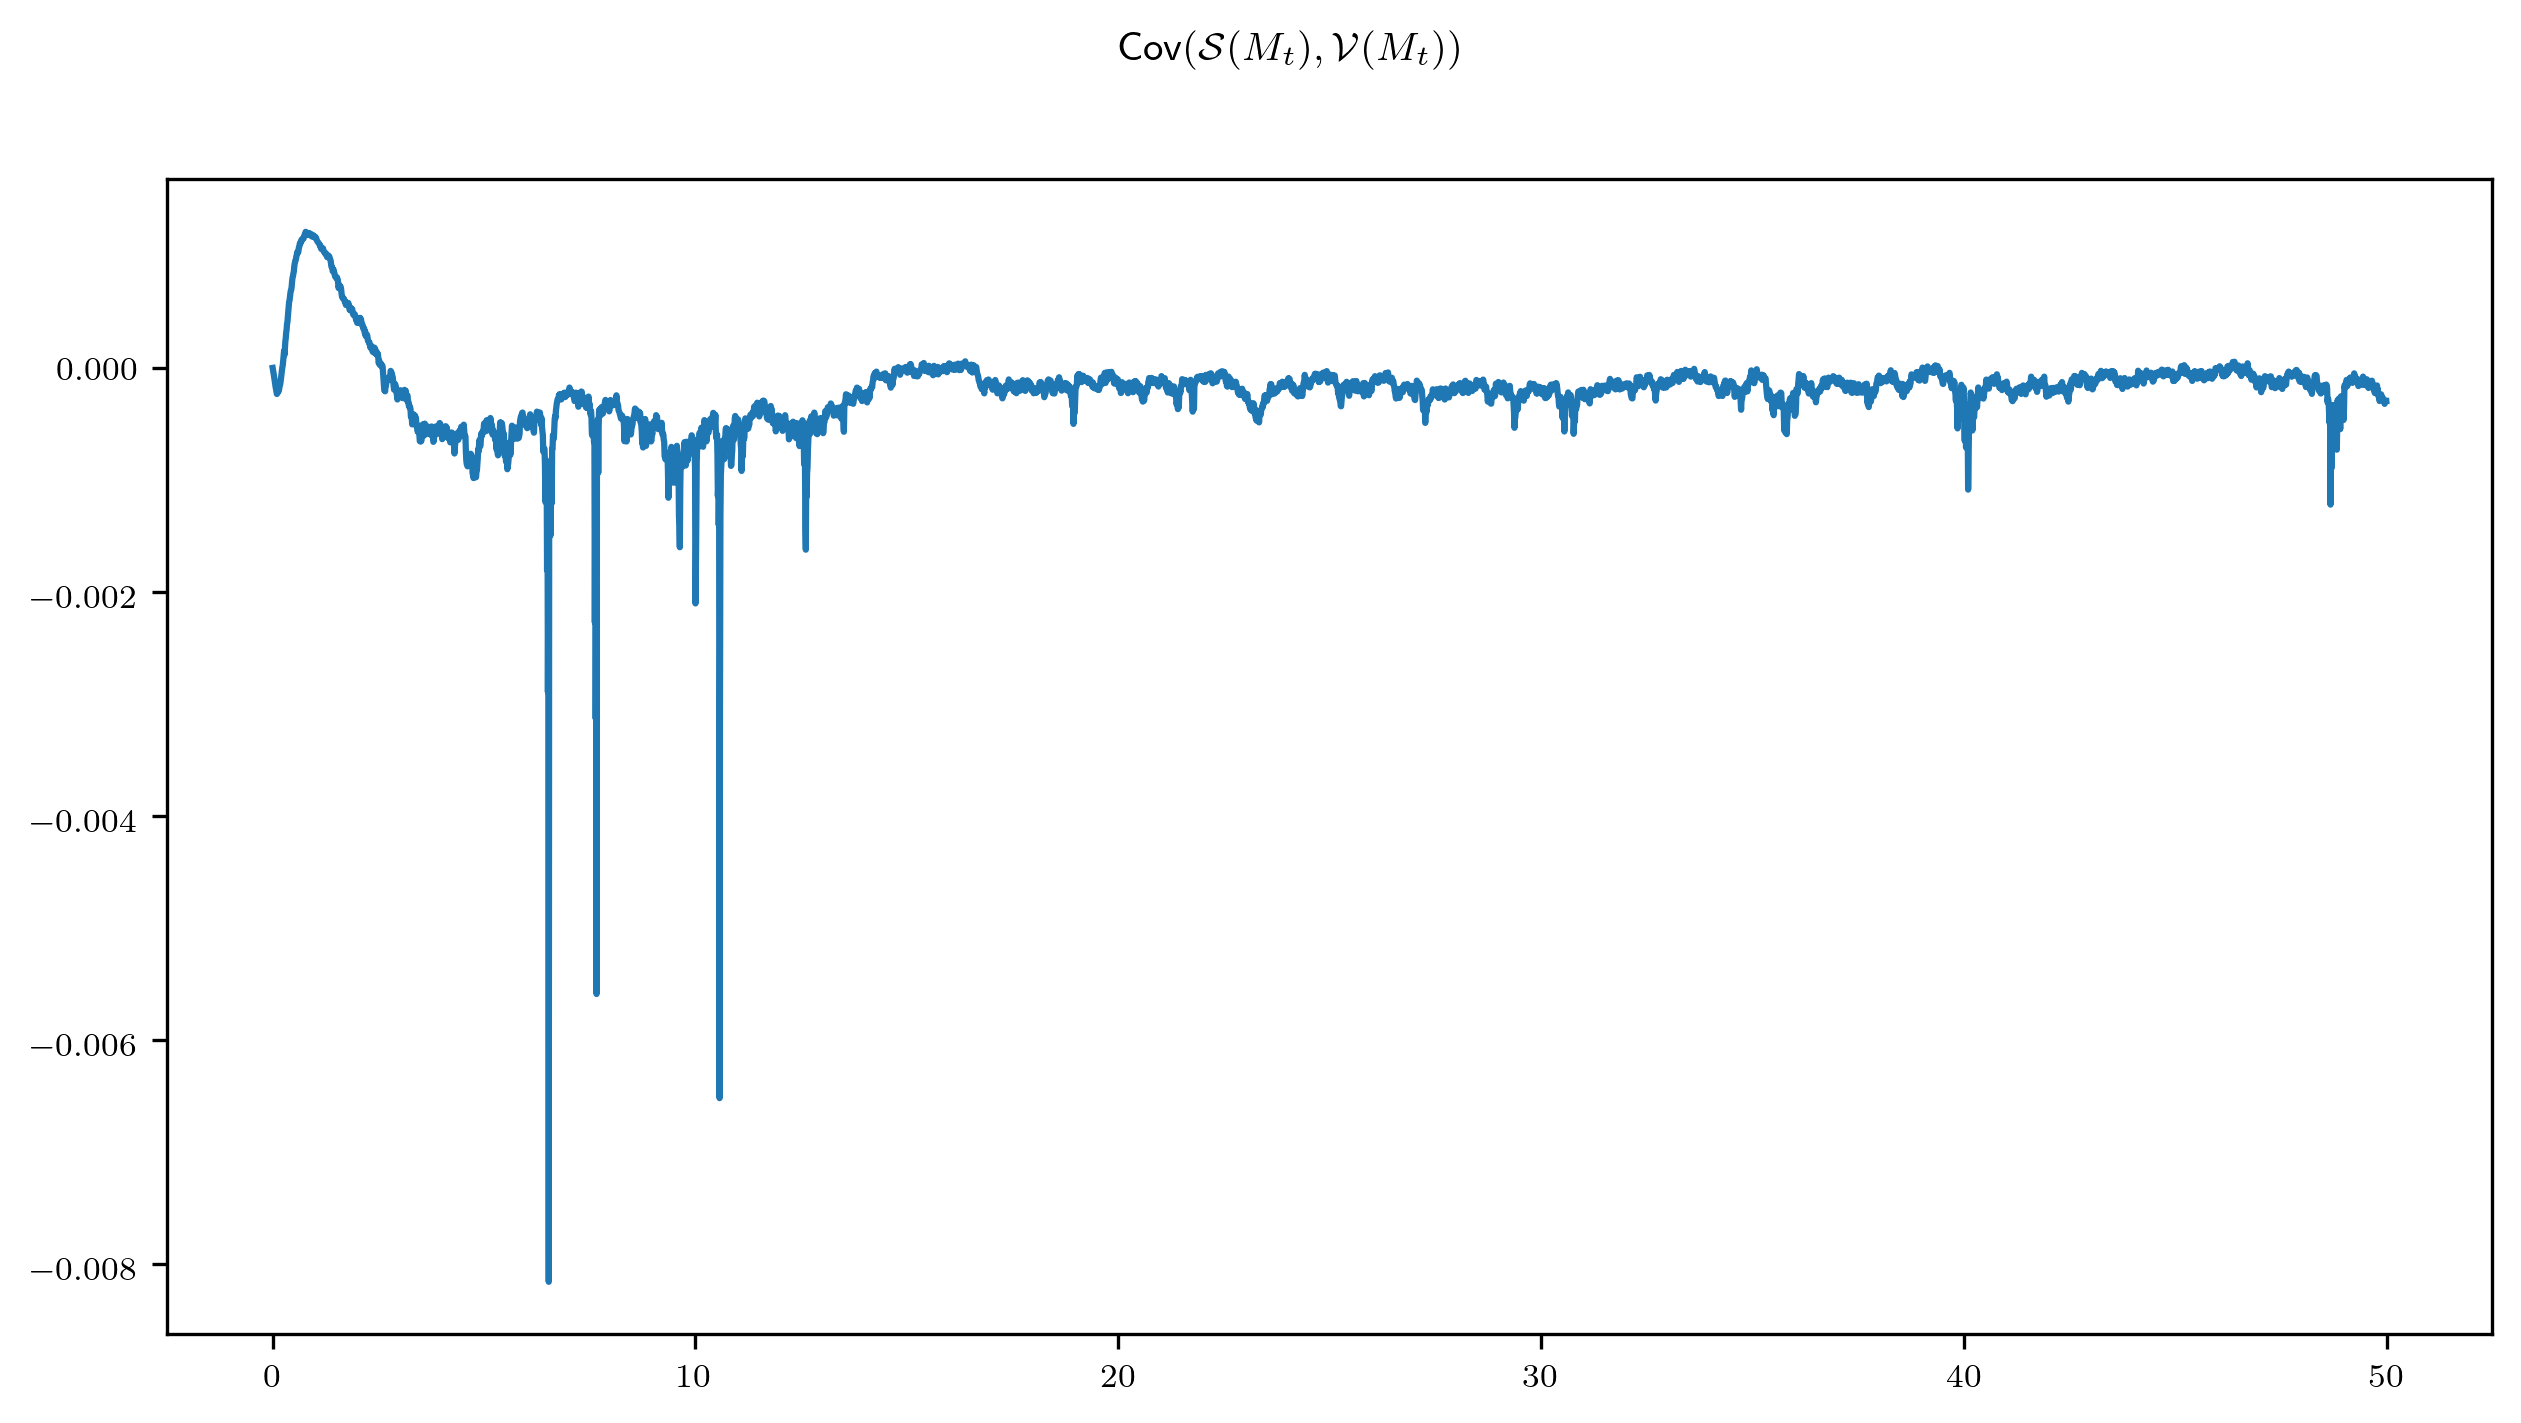

In [ ]:
f = plt.figure(figsize=(10,5), dpi=300)
plt.plot(np.arange(0,T,T/N),((Vol[I,:]*S[I,:]).mean(axis=0)-Vol[I,:].mean(axis=0)*S[I,:].mean(axis=0)),linewidth=1.5);
f.suptitle(r'Cov$(\mathcal{S}(M_t),\mathcal{V}(M_t))$');

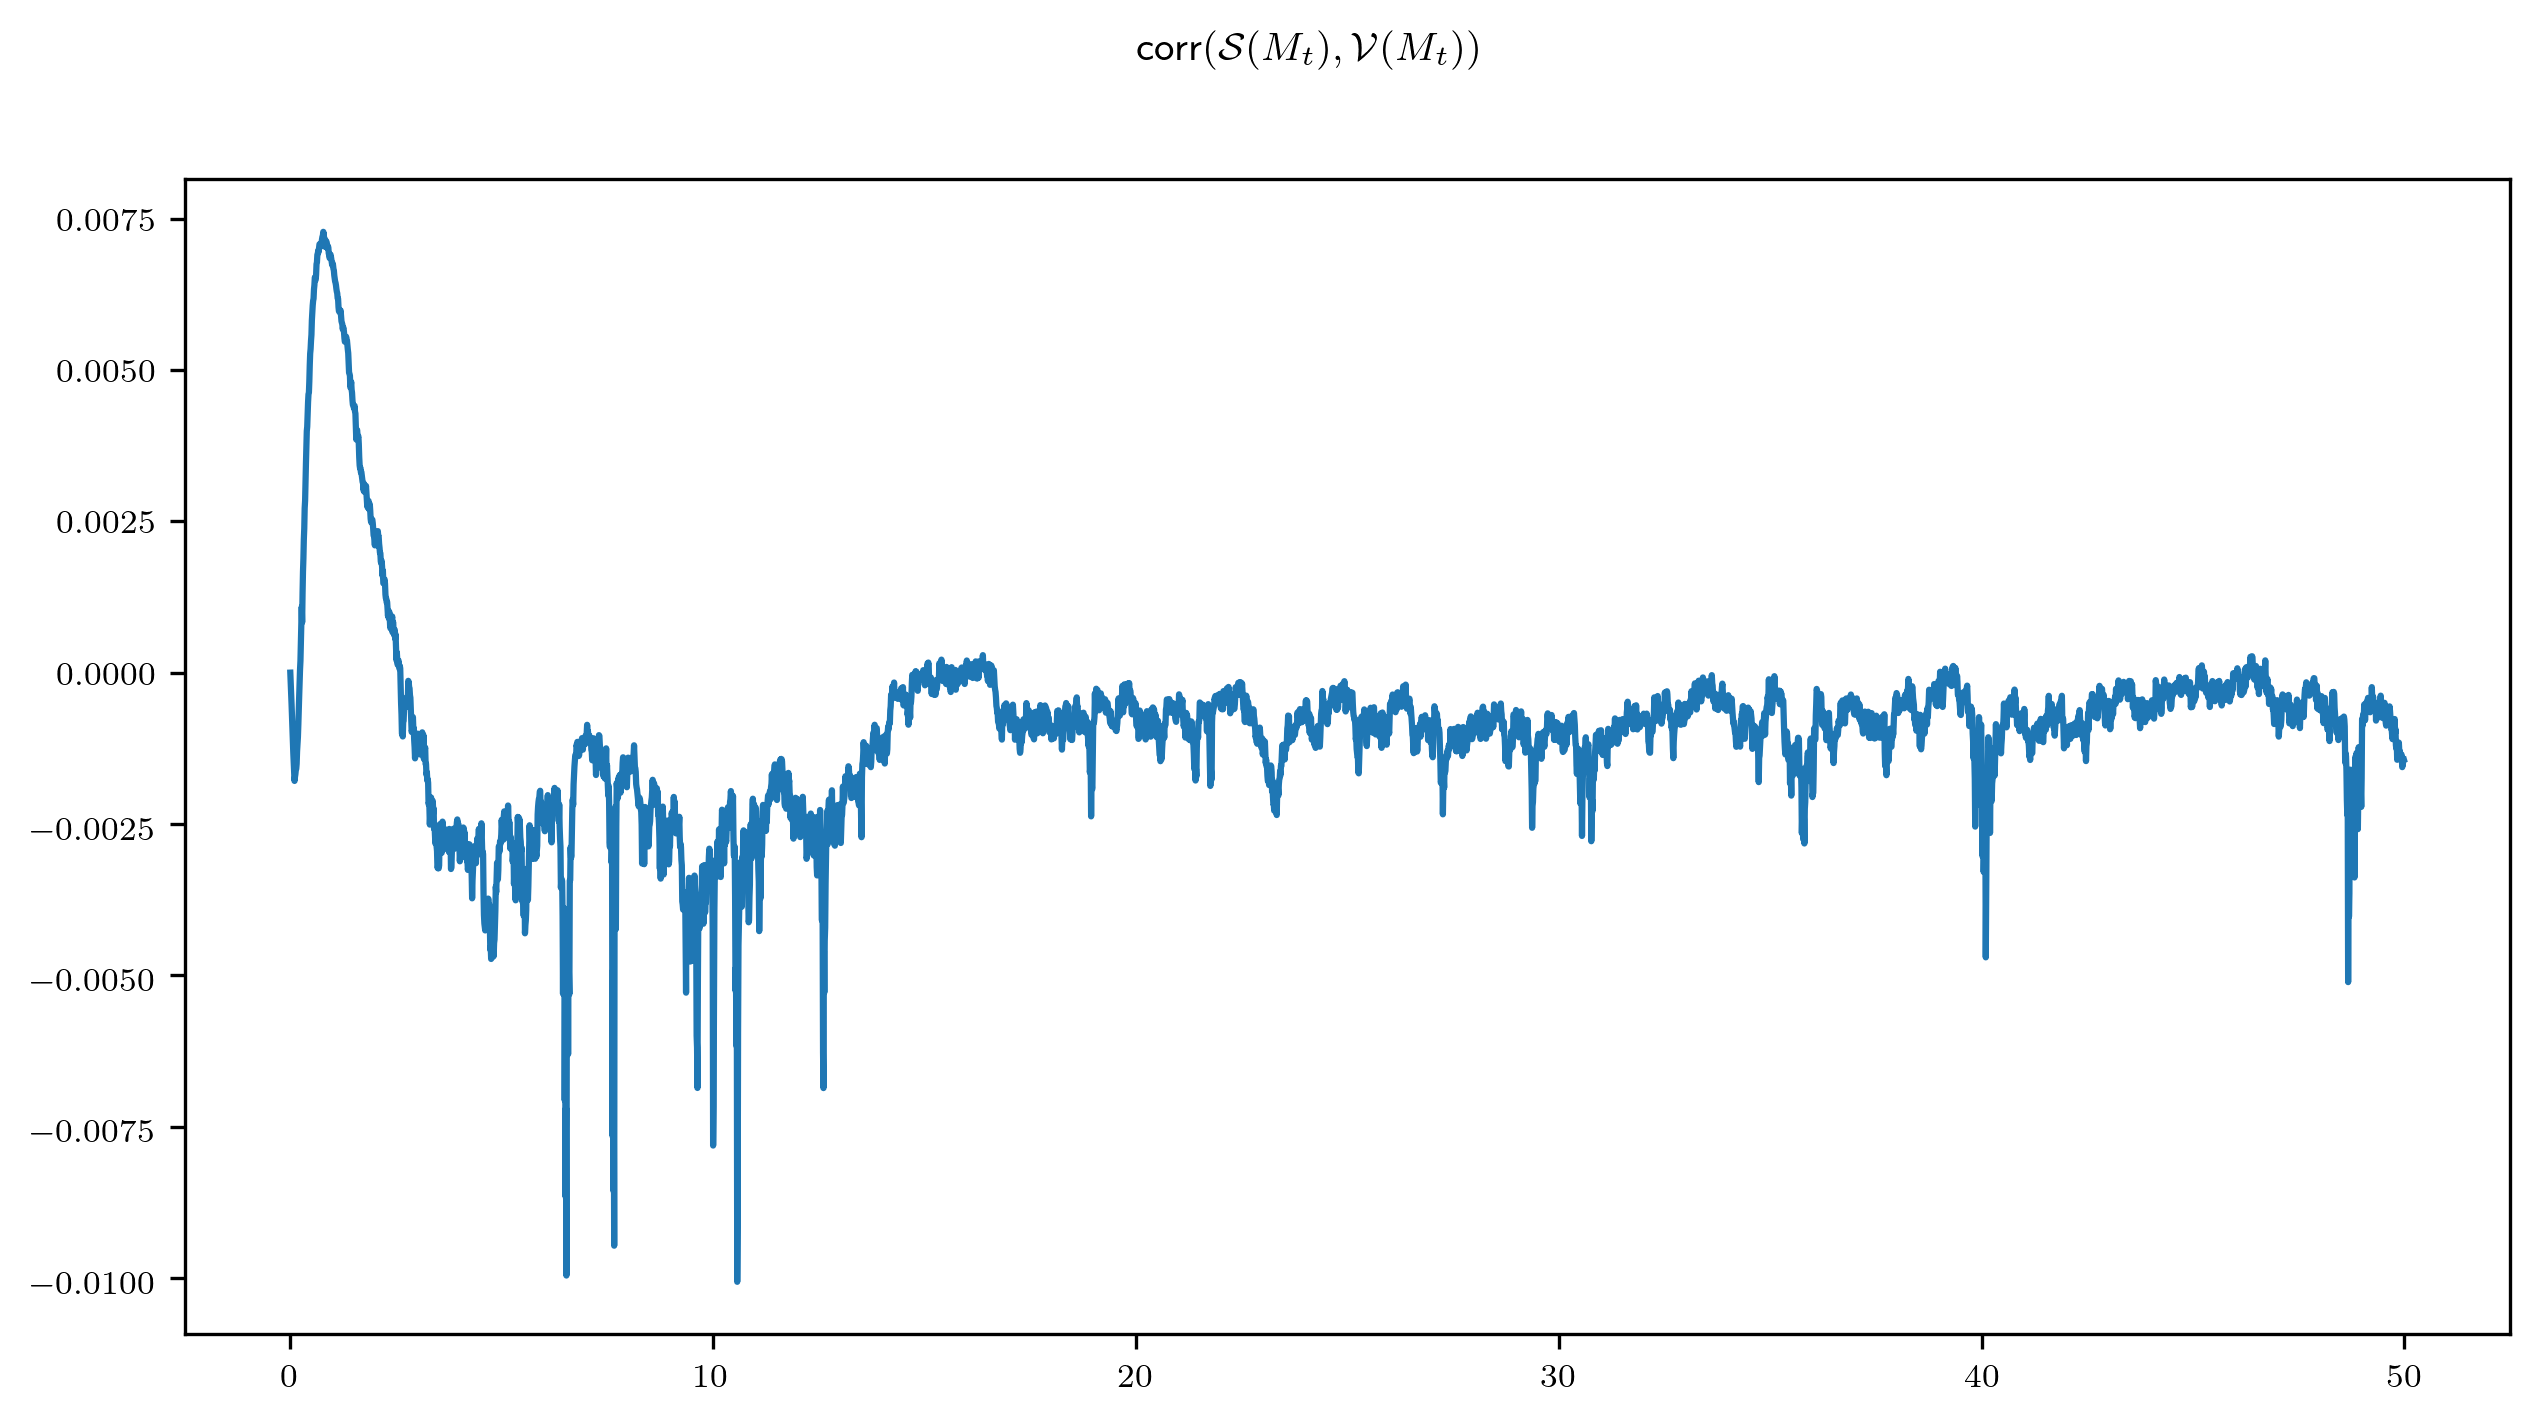

In [ ]:
f = plt.figure(figsize=(10,5), dpi=300)
plt.plot(np.arange(0,T,T/N),((Vol[I,:]*S[I,:]).mean(axis=0)-Vol[I,:].mean(axis=0)*S[I,:].mean(axis=0))/(np.sqrt((Vol[I,:]*Vol[I,:]).mean(axis=0))*np.sqrt((S[I,:]*S[I,:]).mean(axis=0))),linewidth=1.5);
f.suptitle(r'corr$(\mathcal{S}(M_t),\mathcal{V}(M_t))$');

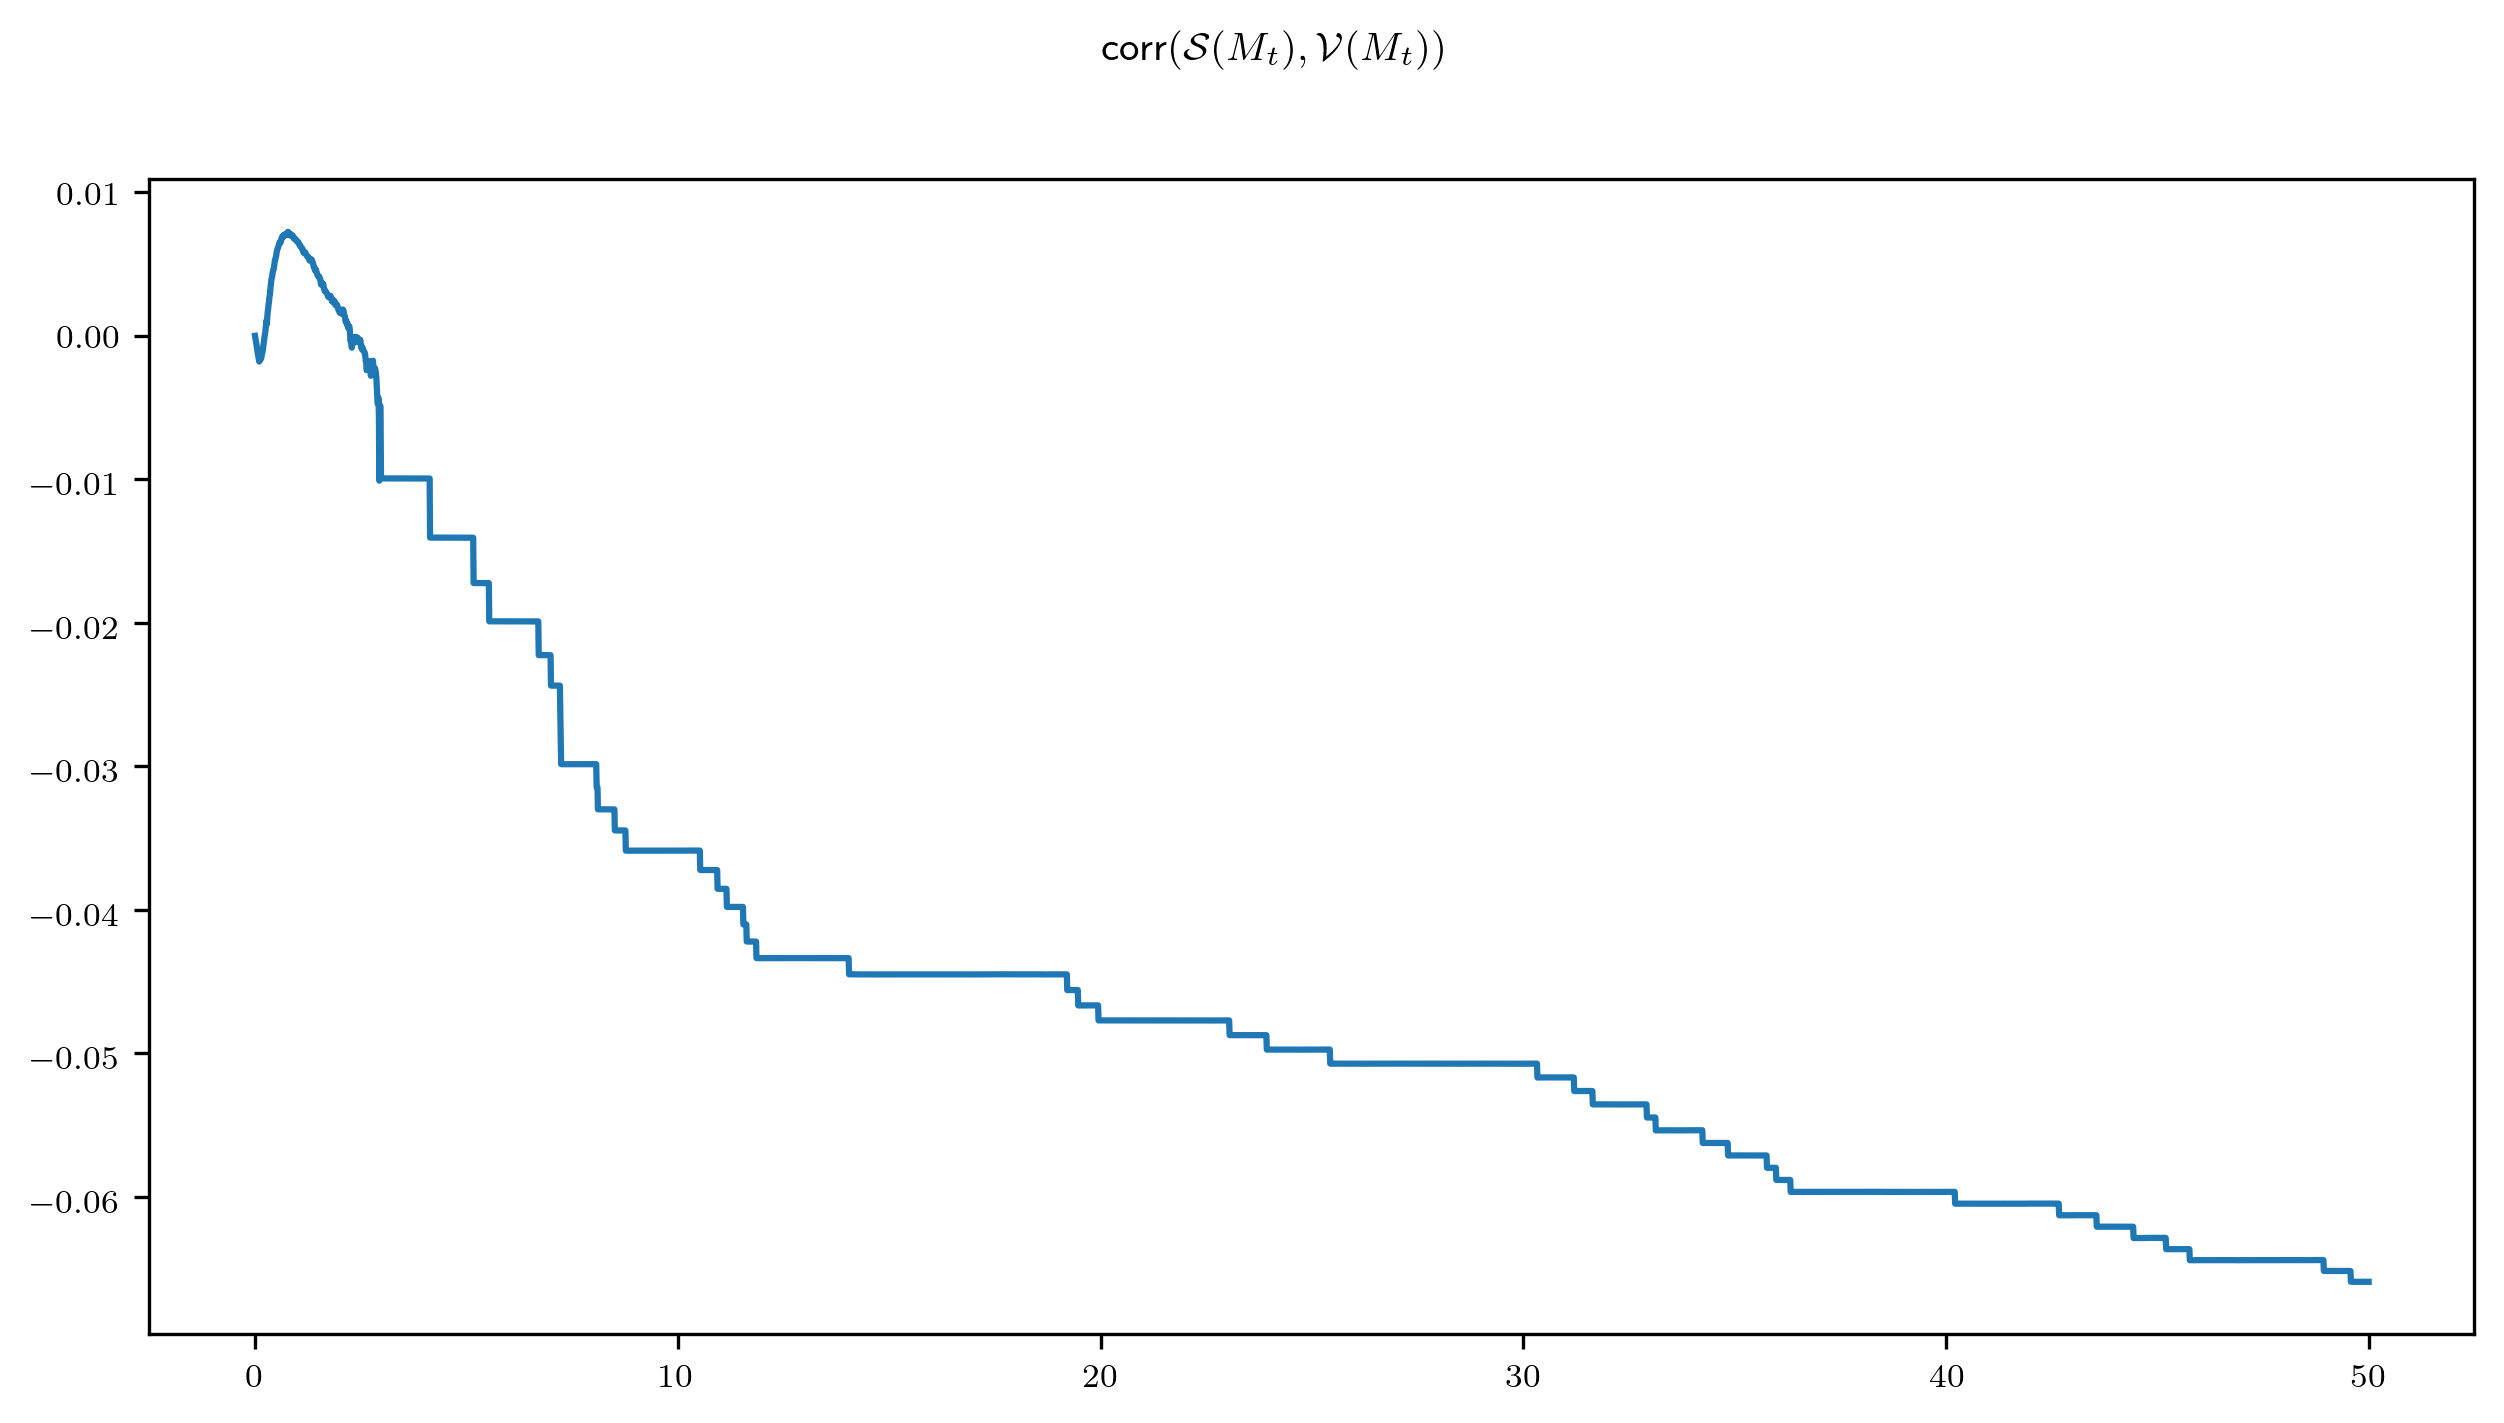

In [ ]:
f = plt.figure(figsize=(10,5), dpi=300)
plt.plot(np.arange(0,T,T/N),((Vol*S).mean(axis=0)-Vol.mean(axis=0)*S.mean(axis=0))/(np.sqrt((Vol*Vol).mean(axis=0))*np.sqrt((S*S).mean(axis=0))),linewidth=1.5);
# Y = np.zeros(X.shape)
# V = np.zeros(X.shape)
# for i in range(X.shape[0]):
#     V[i,:] = vol(X[i,:])
#     Y[i,:] = vol(X[i,:])*SOL.solution_S.sol(X[i,:])[0]
# Svar = np.sqrt((SOL.solution_S.sol(X)[0]*SOL.solution_S.sol(X)[0]).sum(axis=0))    
# Vvar = np.sqrt((V*V).sum(axis=0))
# plt.plot(np.arange(0,T,T/N),Y.mean(axis=0)/(Svar*Vvar),linewidth=1.5);
f.suptitle(r'corr$(\mathcal{S}(M_t),\mathcal{V}(M_t))$');

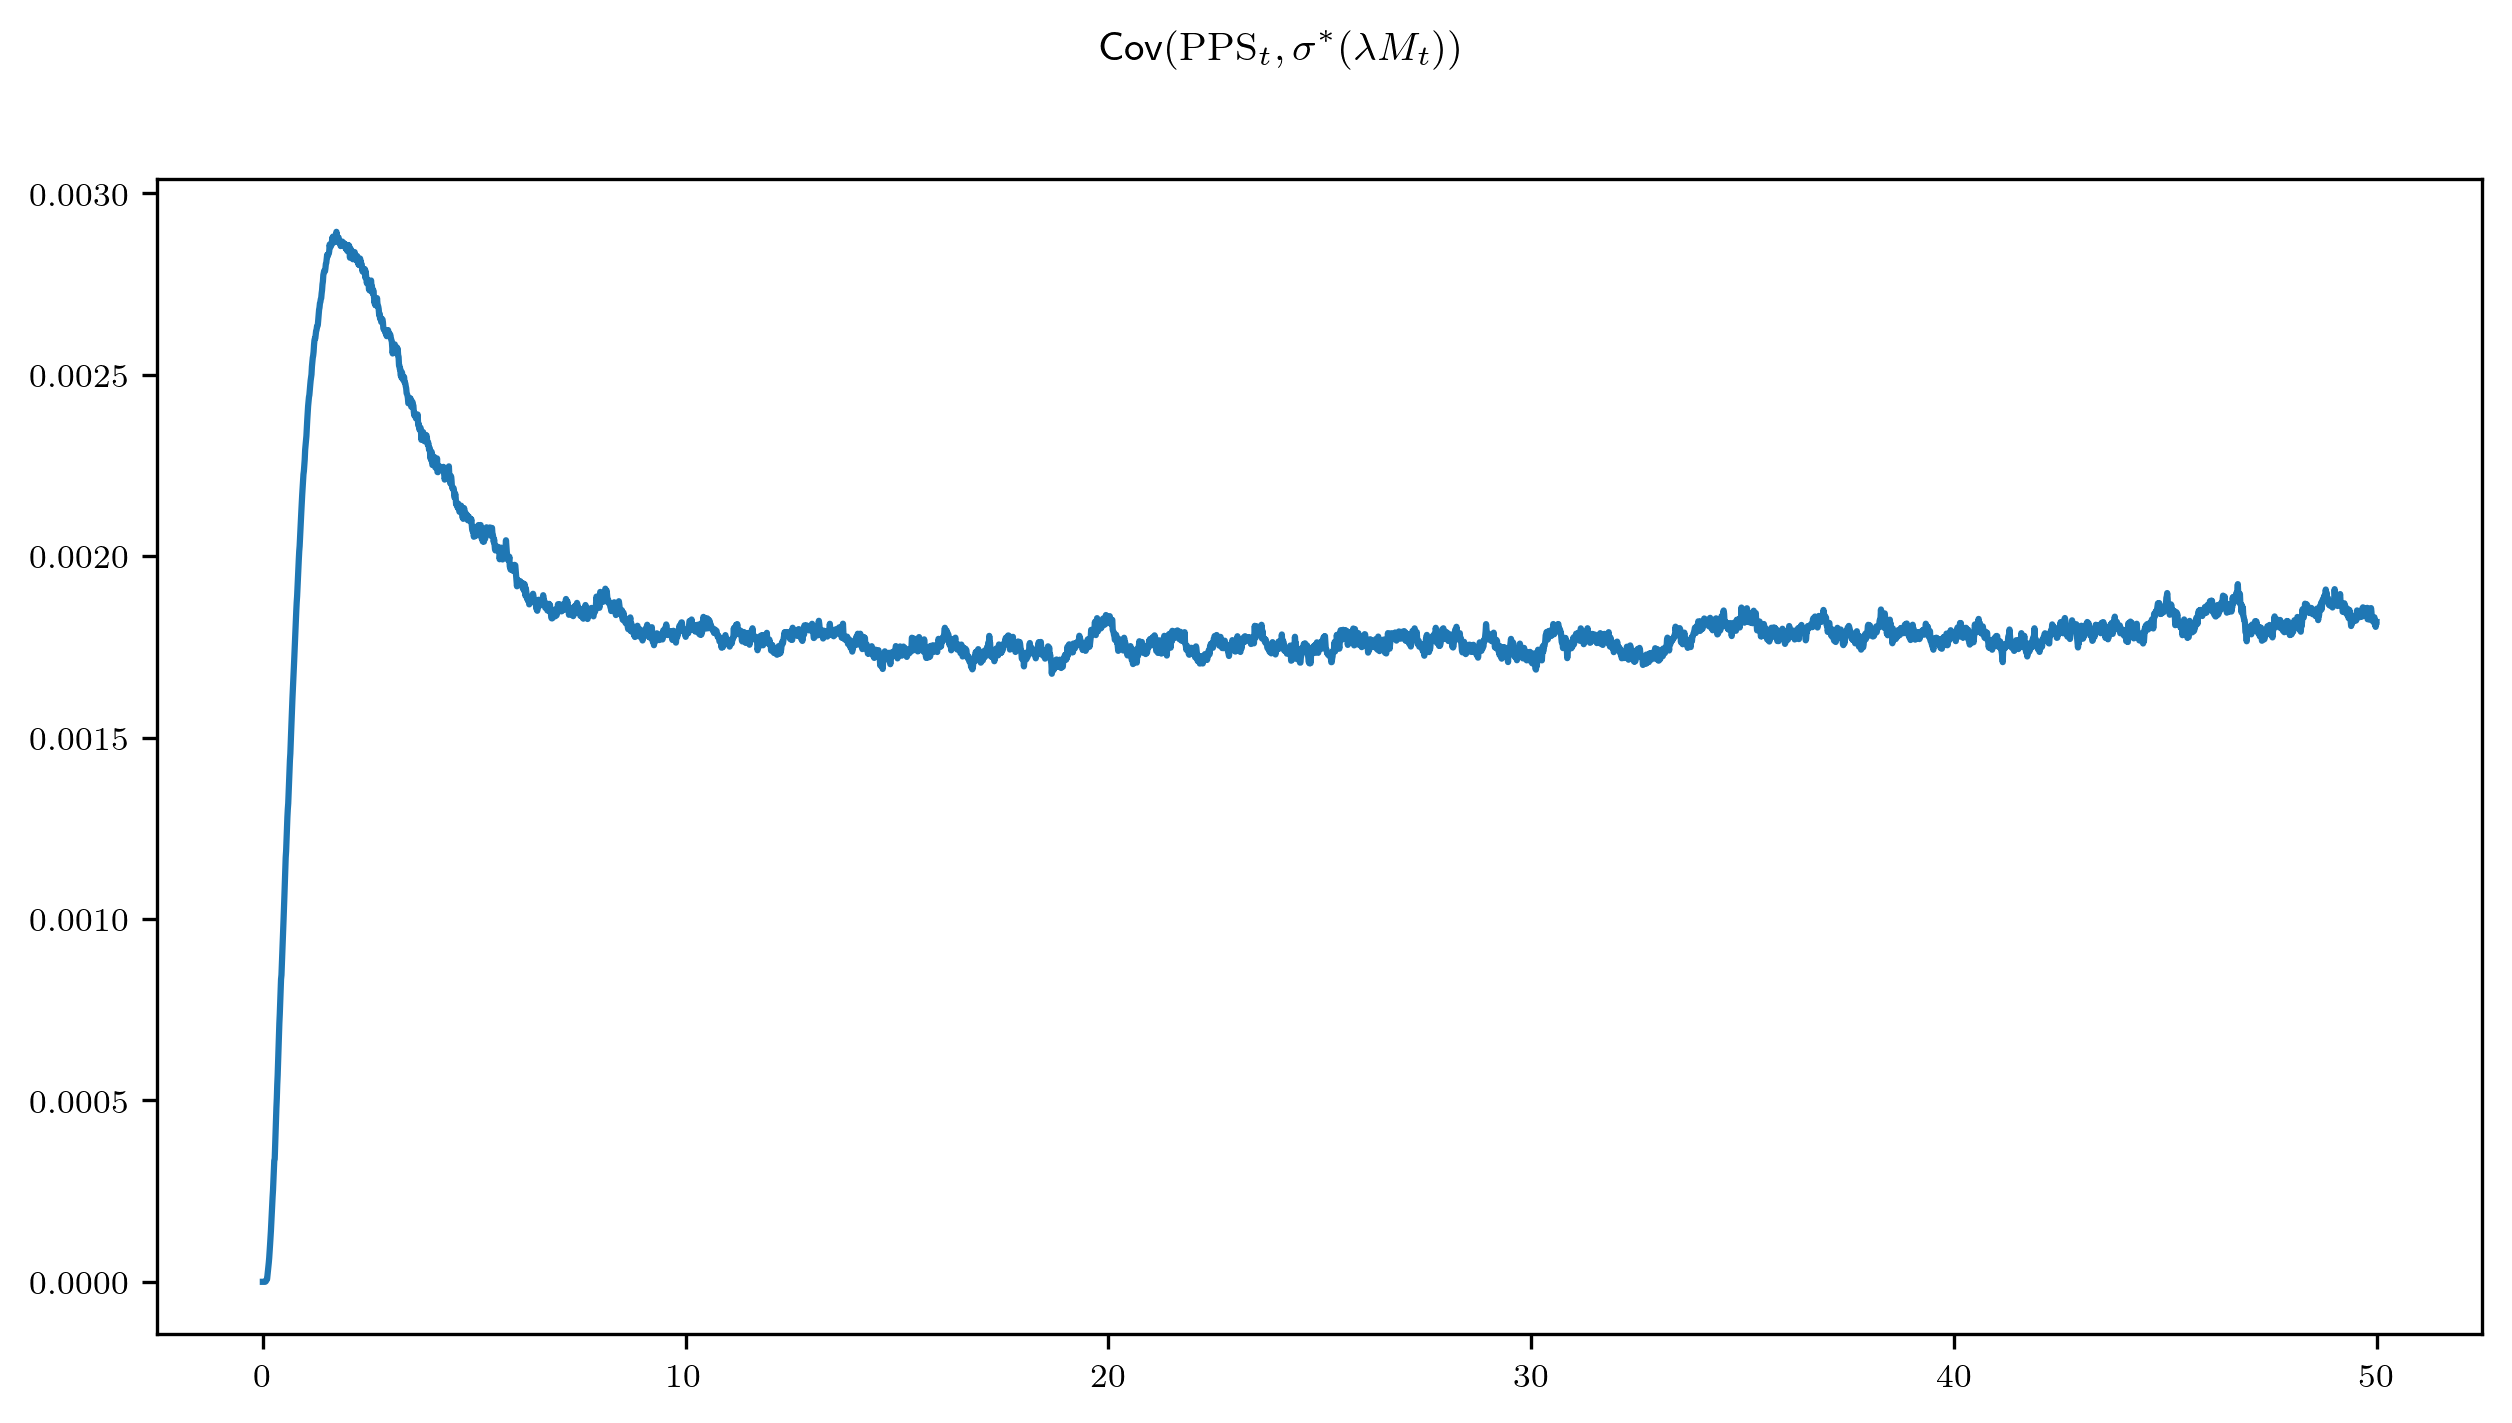

In [ ]:
f = plt.figure(figsize=(10,5), dpi=300)
plt.plot(np.arange(0,T,T/N),((sigma*PPS).mean(axis=0)-sigma.mean(axis=0)*PPS.mean(axis=0)),linewidth=1.5);
f.suptitle(r'Cov$(\textrm{PPS}_t,\sigma^*(\lambda M_t))$');

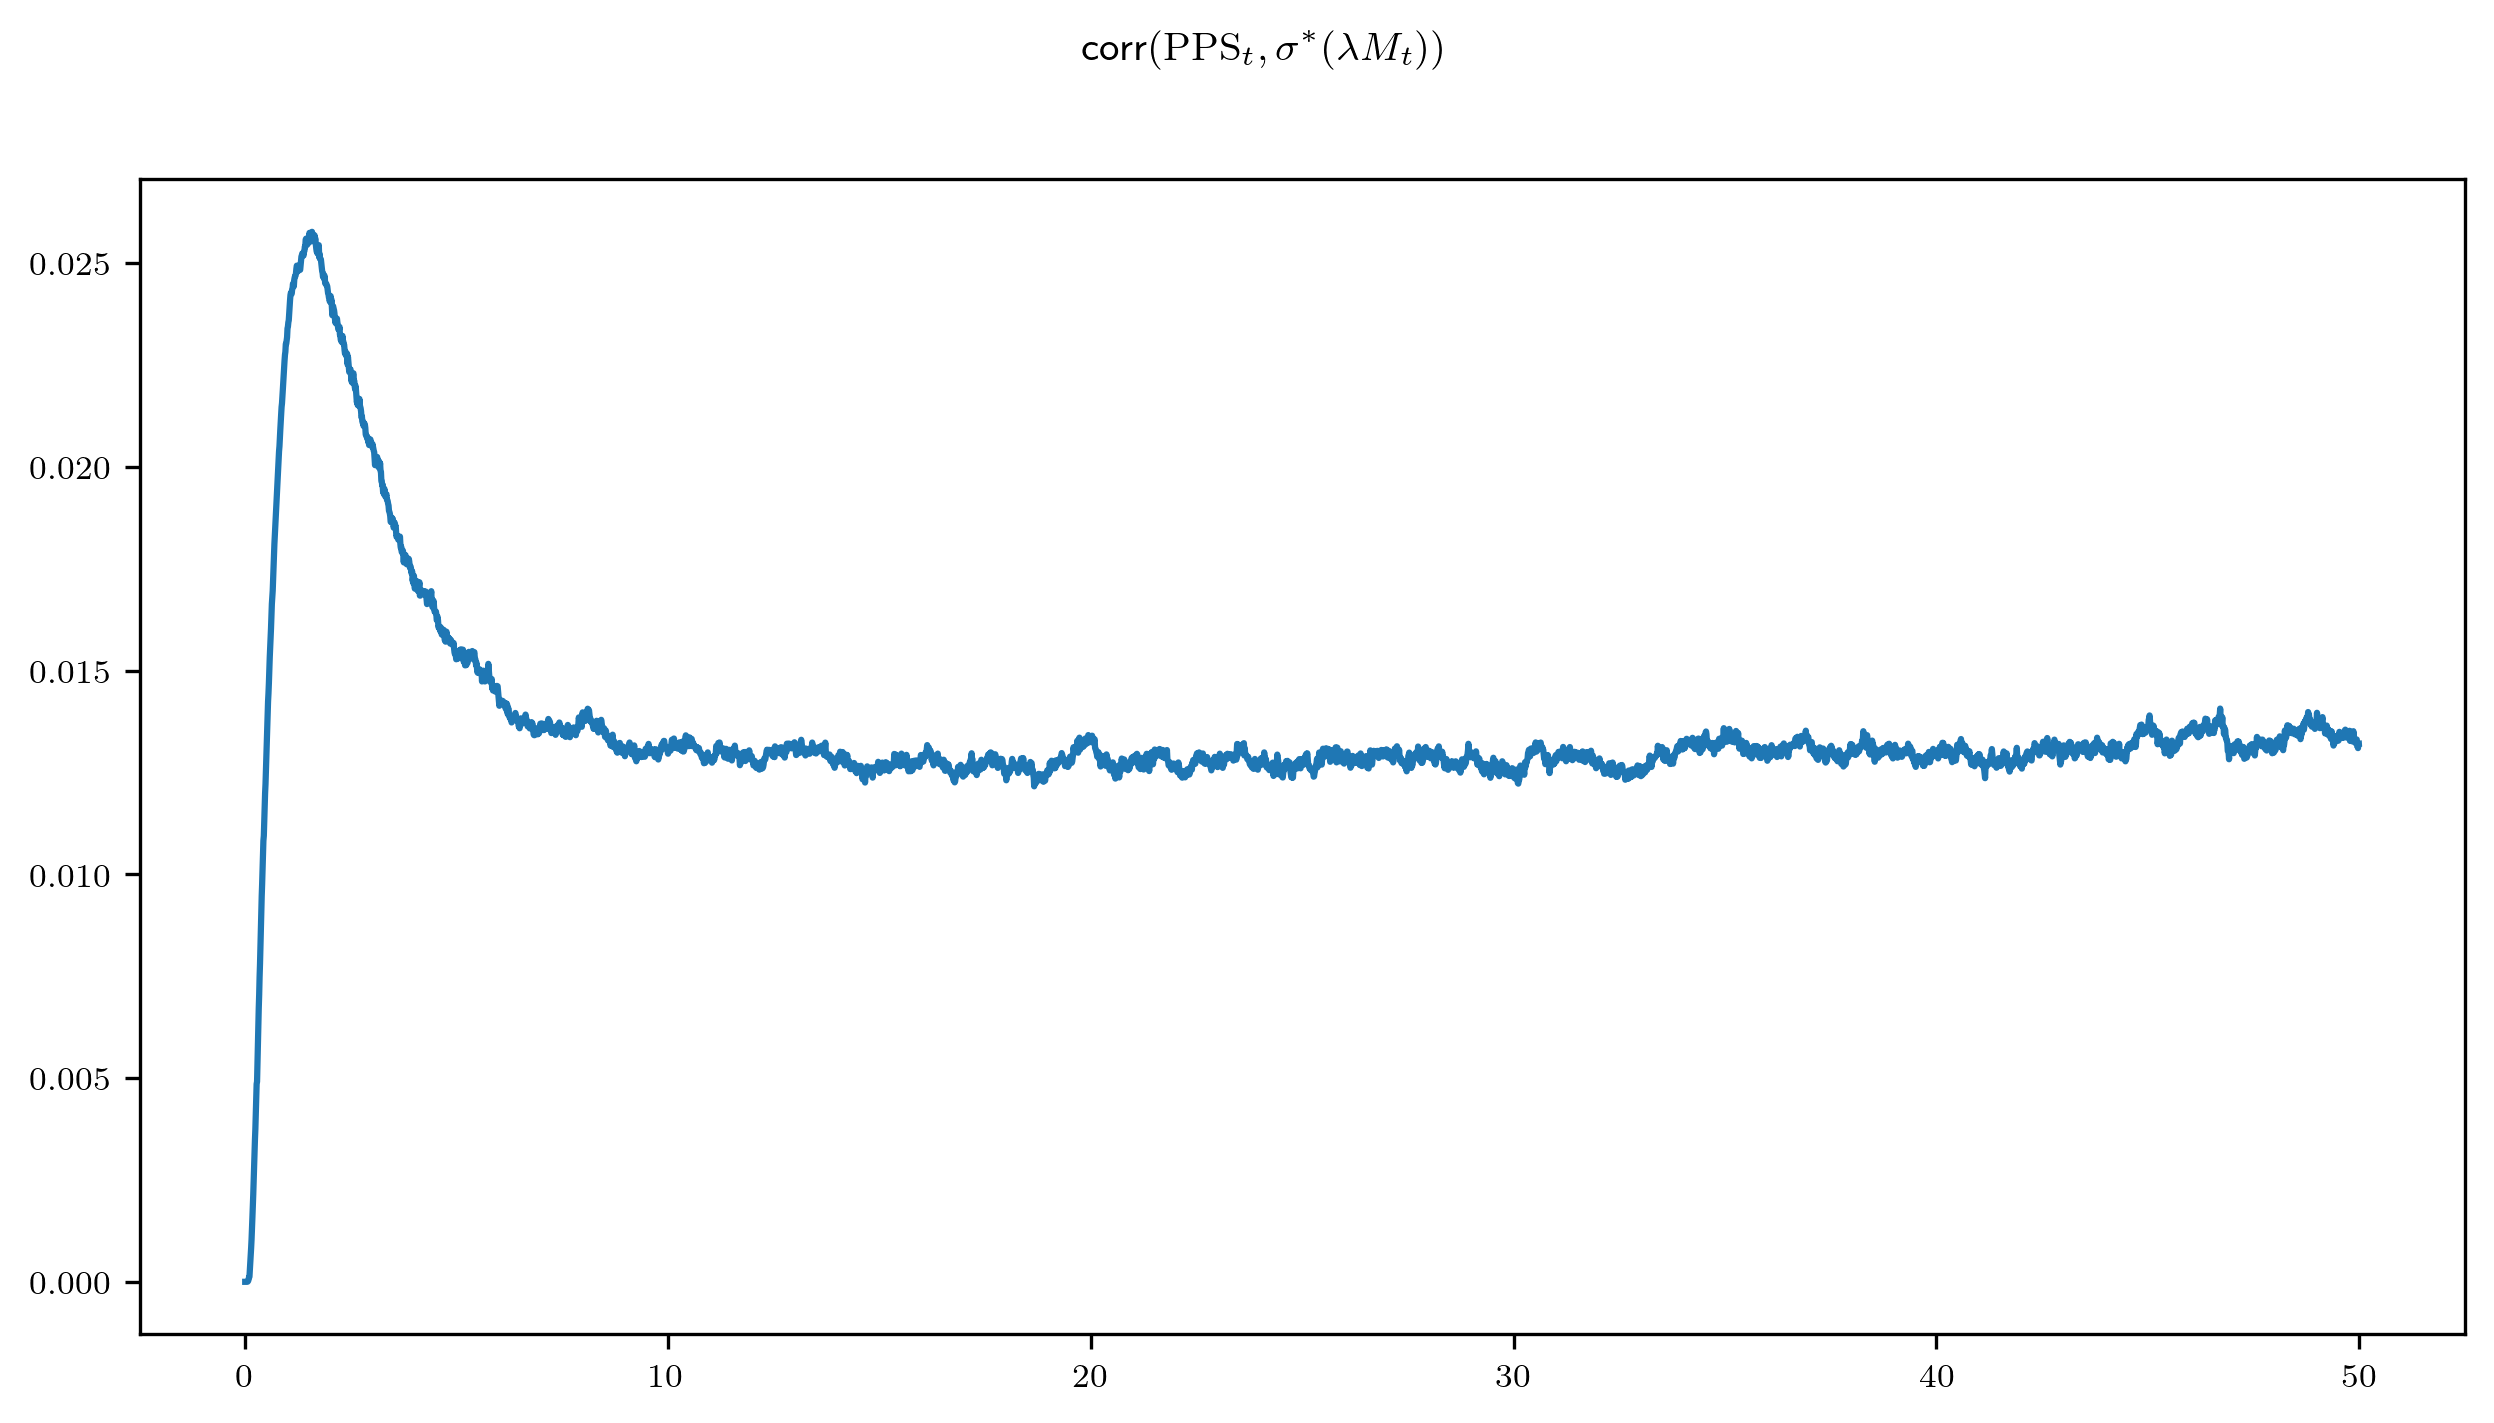

In [ ]:
f = plt.figure(figsize=(10,5), dpi=300)
plt.plot(np.arange(0,T,T/N),((sigma*PPS).mean(axis=0)-sigma.mean(axis=0)*PPS.mean(axis=0))/(np.sqrt((sigma*sigma).mean(axis=0))*np.sqrt((PPS*PPS).mean(axis=0))),linewidth=1.5);
f.suptitle(r'corr$(\textrm{PPS}_t,\sigma^*(\lambda M_t))$');